<a href="https://colab.research.google.com/github/manan-garg/Bank_Deposit_Decision_Expert/blob/main/Bank_Deposit_Decision_Expert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:

To perform binary classification and predict whether the client will subscribe to the bank term deposit or not, based on the dataset from direct marketing campaigns conducted by a Portuguese banking institution. These marketing campaigns were centered around phone calls.

Reference link: https://archive.ics.uci.edu/dataset/222/bank+marketing

## 1. Import relevant Libraries

In [1]:
import numpy as np
import pandas as pdpppp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import warnings

## 2. Set Options

In [2]:
warnings.simplefilter('ignore')
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:.2f}'.format
sns.set_style('white')

## 3. Load Dataset

### 3.1 Downloading Dataset

In [3]:
# bank-additional-full.csv dataset
!gdown 1X9Rk0BZwHvk0G48WDi7lTz650OSUY6tb

Downloading...
From: https://drive.google.com/uc?id=1X9Rk0BZwHvk0G48WDi7lTz650OSUY6tb
To: /content/bank-additional-full.csv
100% 5.83M/5.83M [00:00<00:00, 64.8MB/s]


### 3.2 Reading Dataset

In [6]:
# Creating a dataframe using the dataset
df = pd.read_csv('/content/bank-additional-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


## 4. Exploratory Data Analysis

### 4.1 Basic Metrics

In [5]:
# Shape of the dataset -
df.shape

(41188, 21)

The dataset has 41188 rows and 21 columns.

In [6]:
# Basic info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- The provided data represents a dataset with various features such as age, job, marital status, education, and economic indicators like employment variation rate, consumer price index, and others.
- The target variable 'y' is binary.
- No row has a null value for any column in the whole dataset.

In [7]:
# Checking data types -
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

- The dataset features have different data types, such as integers (int64) for numerical variables like age, duration, and campaign, and objects for categorical variables like job, marital status, education, and others.
- The target variable 'y' is also of object type.

In [8]:
# Statistical summary
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


- The average age of the individuals is 40.02 years, ranging from 17 to 98 years, with a standard deviation of 10.42 years.

- Campaign duration varies widely, with a mean of 258.29 units and a considerable standard deviation of 259.28 units.

- On average, individuals were contacted 2.57 times during the campaign, but this number can be as high as 56.

- The time since the previous campaign (pdays) has a mean of 962.48 days, with a broad range from 0 to 999 days.

- The average number of previous contacts is 0.17, with a maximum of 7.

- Employment variation rates, consumer price indices, and consumer confidence indices show varying degrees of fluctuation.

- The dataset also includes information on the Euribor 3-month rate and the number of employed individuals, providing a comprehensive overview of the campaign-related features and demographic details.








In [9]:
# Checking number of duplicate rows
df.duplicated().sum()

12

There are 12 duplicate rows in the dataset. We will drop them.

In [10]:
# dropping duplicate rows
df.drop_duplicates(inplace=True)

In [11]:
# Checking number of duplicate rows again
df.duplicated().sum()

0

There are no duplicate rows now.

### 4.2 Non-Graphical Analysis

In [12]:
# Number of Unique Value in each column
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

- The 'age' column has 78 unique values, indicating the age range of individuals.
- The 'job' column has 12 unique values, representing different occupations.
- The 'marital' column has 4 unique values, indicating marital status.
- Similarly, 'education' has 8 unique values.
- Categorical columns such as 'default,' 'housing,' 'loan,' 'contact,' 'month,' 'day_of_week,' and 'poutcome' have 3 or 5 unique values each.
- Numerical columns like 'duration' range up to 1544, 'campaign' has 42 unique values, 'pdays' has 27, 'previous' has 8, and 'emp.var.rate,' 'cons.price.idx,' 'cons.conf.idx,' 'euribor3m,' and 'nr.employed' have varying numbers of unique values.
- The target variable 'y' has 2 unique values, indicating binary classification.

In [13]:
# Checking count of unique values in 'pdays'
df.pdays.value_counts()

999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

- pdays is the number of days that passed by after the client was last contacted from a previous campaign.
- A '999' value in a pday column means the client was not previously contacted.

So, let's replace the '999' value with '-1' in all the rows where pdays is '999' in the dataset.

In [14]:
# Replacing '999' with '-1' in pdays
df.pdays = df.pdays.replace(999,-1)

In [15]:
# Checking count of unique values in 'pdays' again
df.pdays.value_counts()

-1     39661
 3       439
 6       412
 4       118
 9        64
 2        61
 7        60
 12       58
 10       52
 5        46
 13       36
 11       28
 1        26
 15       24
 14       20
 8        18
 0        15
 16       11
 17        8
 18        7
 22        3
 19        3
 21        2
 25        1
 26        1
 27        1
 20        1
Name: pdays, dtype: int64

In [16]:
# Categorical columns list
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                       'day_of_week', 'previous', 'poutcome', 'y']

# Checking value counts for categorical columns -
for i in categorical_columns:
    print("Column: ",i)
    print(df[i].value_counts())
    print('\n')

Column:  job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


Column:  marital
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64


Column:  education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64


Column:  default
no         32577
unknown     8596
yes            3
Name: default, dtype: int64


Column:  housing
yes        21571
no         18615
unknown      990
Name: housing, dtype: int64


Column:  loan
no         33938
yes         6248
unknown      990
Name: loan, dtype: int

- The 'job' column includes categories such as admin, blue-collar, technician, etc., with corresponding counts.
- Similarly, the 'marital' column shows counts for married, single, divorced, and unknown.
- The 'education' column includes categories like university degree, high school, and various others.
- The columns 'default', 'housing', and 'loan' depict counts for different options.
- 'Contact' shows counts for cellular and telephone.
- The 'month' column displays counts for different months.
- 'Day_of_week' shows counts for days of the week.
- The 'previous' column indicates counts for different numbers of previous contacts.
- The 'poutcome' column displays counts for nonexistent, failure, and success outcomes.
- Finally, the 'y' column represents counts for 'yes' and 'no' outcomes.

### 4.3 Visual Analysis

#### 4.3.1 Univariate Analysis


##### 4.3.1.1 Categorical Variables

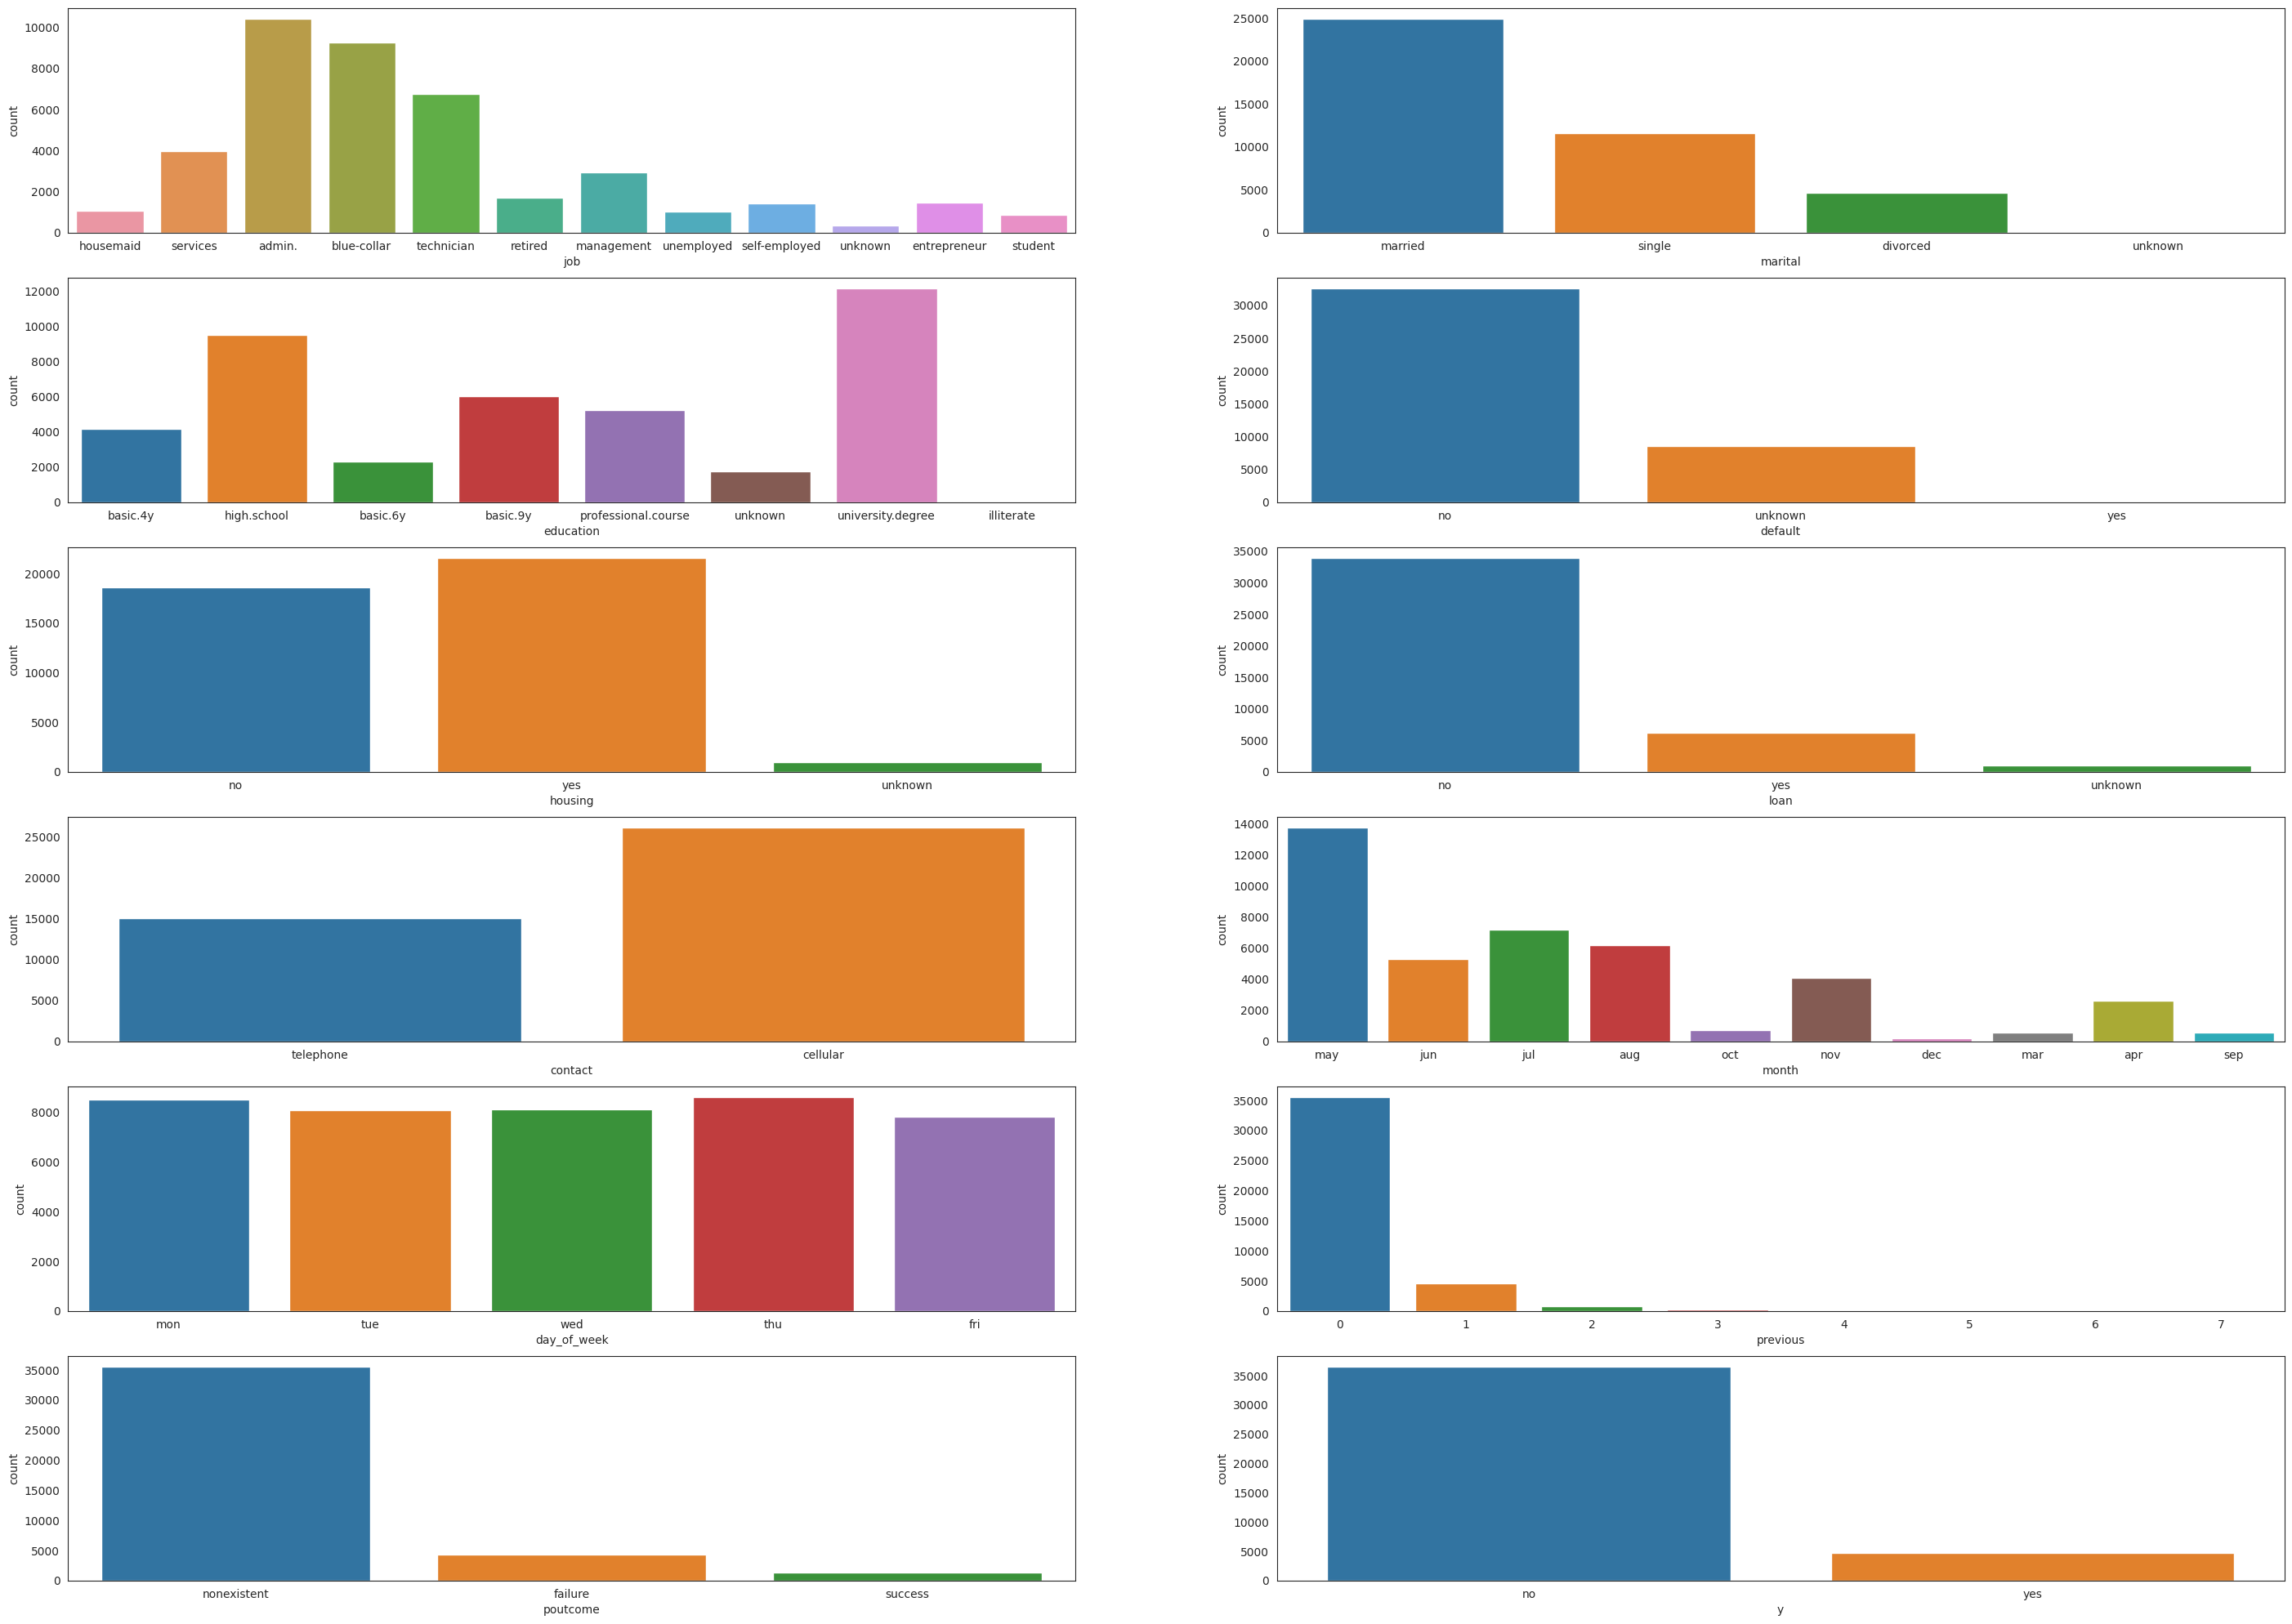

In [17]:
# Countplot for categorical columns
fig, axes = plt.subplots(6, 2, figsize = (35, 25))
cols = categorical_columns
for i in range(len(cols)):
    p = sns.countplot(x = cols[i], data = df, ax = axes[i//2,i%2])

1. **Job:**
   - The most common occupations are in administration, blue-collar, and technology, with a notable number of clients in management and services.
   - Students and retirees constitute smaller proportions, while there is a category labeled as "unknown" with a few entries.

2. **Marital:**
   - The majority of clients are married, followed by singles and divorced individuals. A small number of entries have an unknown marital status.

3. **Education:**
   - A significant portion of clients have a university degree, while others have completed high school or basic education. There's also a noticeable number with an unknown education level.
   - The dataset includes a small count of clients who are illiterate.

4. **Default:**
   - The majority of clients have no credit default history. There are a few entries with unknown default status, and only a handful with a history of default.

5. **Housing:**
   - More clients have housing loans (labeled as "yes") than those without, and there's a smaller proportion with unknown housing status ("unknown").

6. **Loan:**
   - The majority of clients do not have personal loans. Similar to housing, there's a smaller portion with unknown loan status.

7. **Contact:**
   - The dataset is dominated by clients who were contacted via cellular communication, with a significant but smaller count contacted via telephone.

8. **Month:**
   - May, July, and August are the most common months in which clients were contacted. December has the fewest contacts.

9. **Day_of_week:**
   - Thursday appears to be the most common day for client contacts, with Monday and Wednesday following closely.

10. **Previous:**
    - A vast majority of clients had no previous contacts, with a decreasing count as the number of previous contacts increases.

11. **Poutcome:**
    - The majority of clients had a nonexistent outcome in the previous marketing campaign. A smaller proportion had either successful or failed outcomes.

12. **Y (Target Variable):**
    - The dataset is imbalanced, with a significantly higher count of clients who did not subscribe to a term deposit ("no") compared to those who did ("yes").

##### 4.3.1.2 Continuous Variables

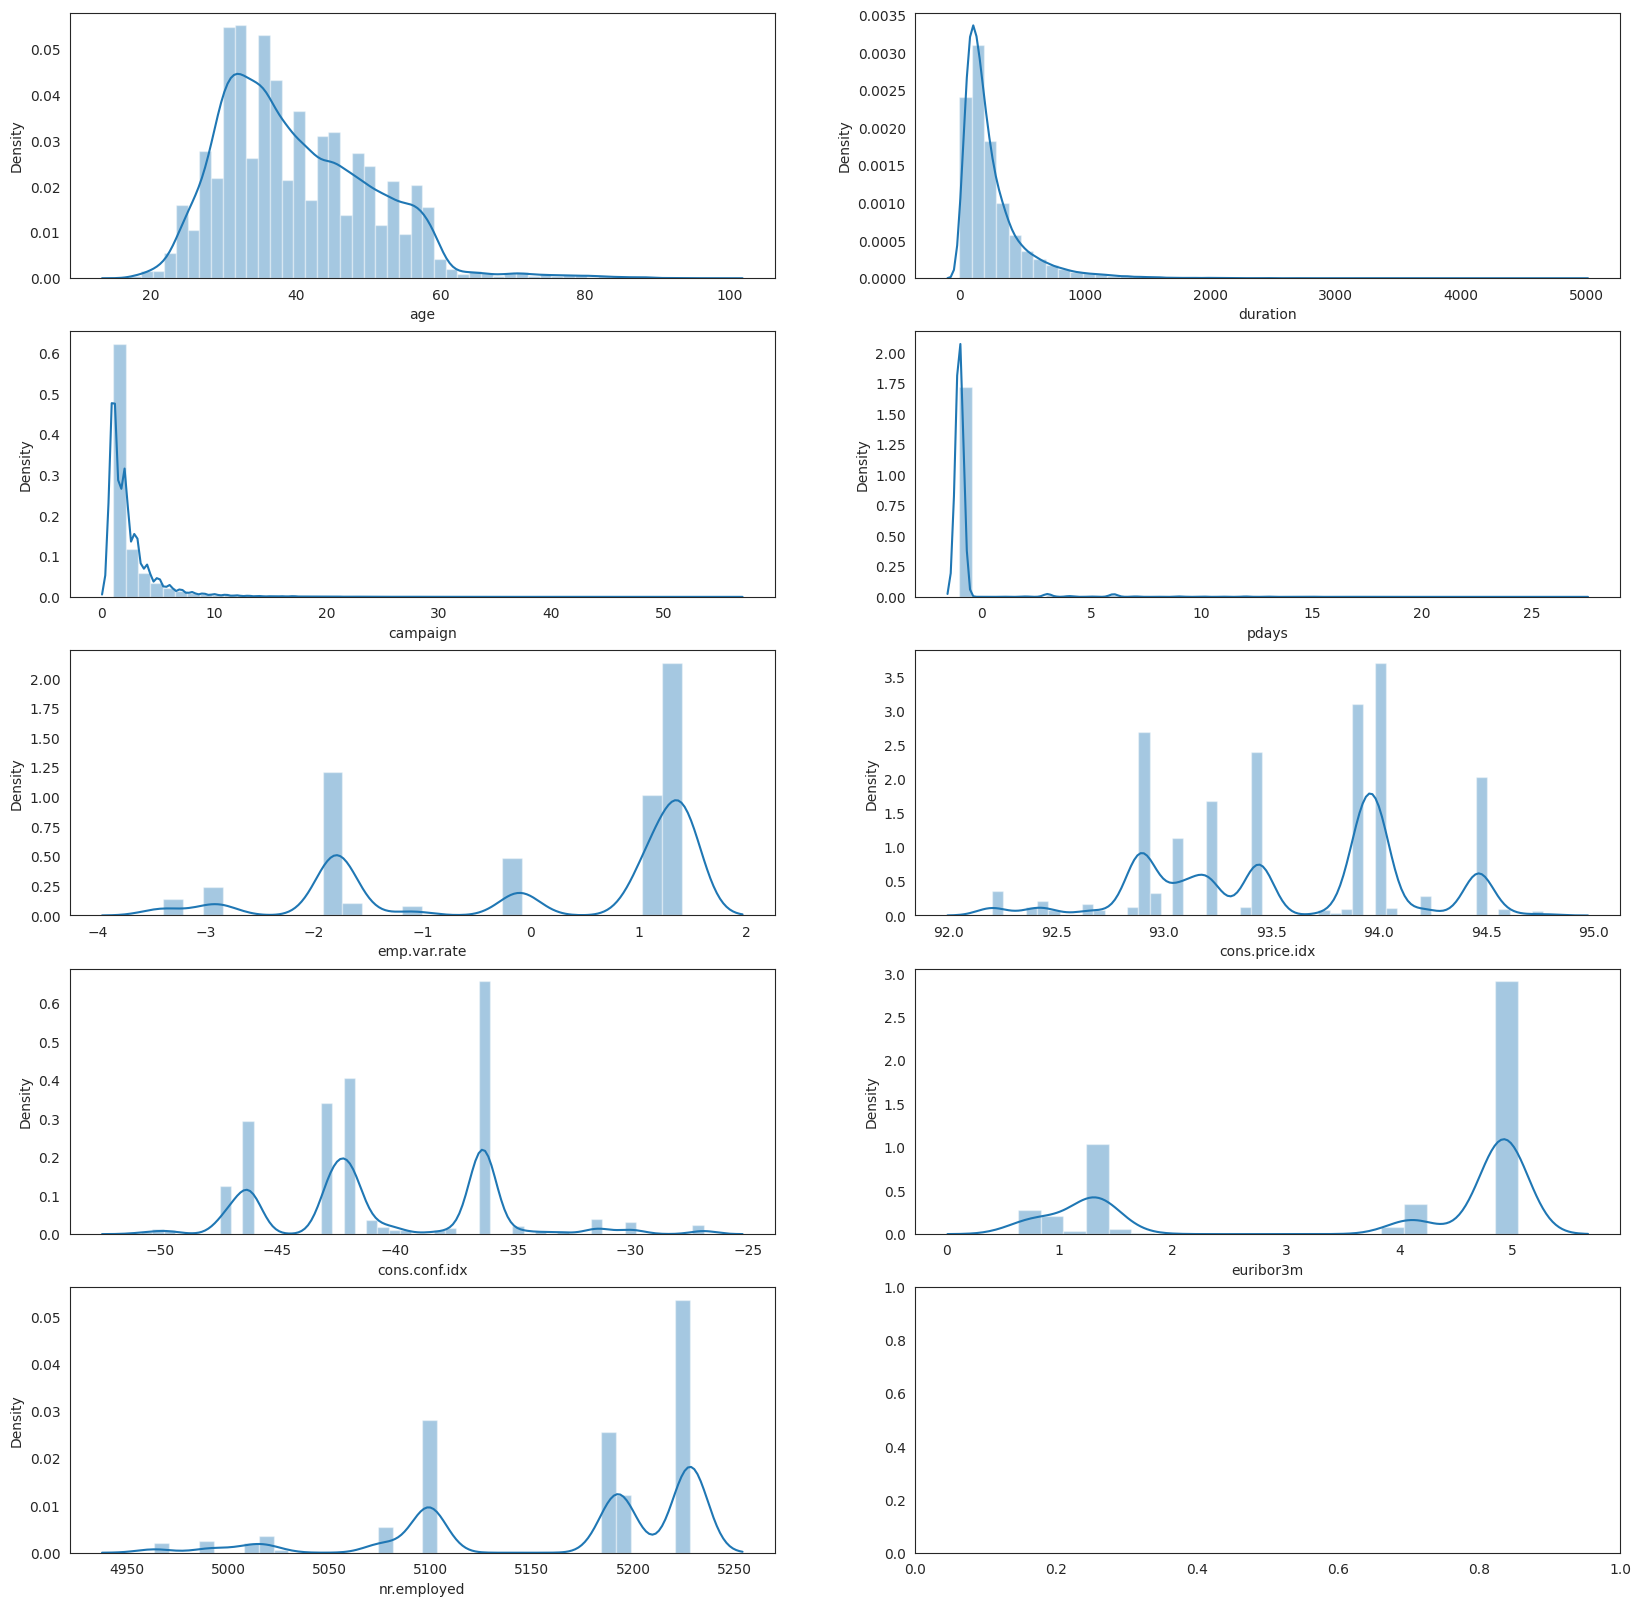

In [18]:
# Continuous columns list
continuous_columns = ['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                      'euribor3m', 'nr.employed']

# Distplot for continuous columns
fig, axes = plt.subplots(5, 2, figsize = (20, 20))
cols = continuous_columns
for x in range(len(cols)):
    p = sns.distplot(df[cols[x]], ax = axes[x//2,x%2])

1. **Age:**
   - The age distribution is relatively balanced, with a peak around 30-35 years. There are a few clients in their 80s and 90s, contributing to a right-skewed distribution.

2. **Duration:**
   - Most calls have a short duration, concentrated around 0-500 seconds. There's a notable peak in the shorter duration range, with a long tail extending to higher durations, indicating some longer conversations.

3. **Campaign:**
   - The number of contacts made during the campaign varies, with a substantial number of clients being contacted only once. The distribution is right-skewed, with a long tail, suggesting a few clients were contacted extensively.

4. **Pdays:**
   - The majority of clients have a pdays value of -1, indicating they were not previously contacted. There are a few cases with positive values, representing the number of days since the client was last contacted.

5. **Emp.var.rate:**
   - The employment variation rate is concentrated around 1.4, indicating a positive trend. There are spikes at other values, representing different economic conditions during the campaign.

6. **Cons.price.idx:**
   - The consumer price index shows multiple peaks, reflecting variations in pricing. The distribution is right-skewed, with a concentration around 93.5-94.

7. **Cons.conf.idx:**
   - The consumer confidence index exhibits distinct peaks, indicating varying levels of consumer confidence during the campaign. The distribution is right-skewed, with a concentration around -40.

8. **Euribor3m:**
   - The Euribor 3-month rate is centered around 4.9, with multiple spikes at different levels. The distribution suggests variations in the Euribor rate during the campaign.

9. **Nr.employed:**
   - The number of employees is concentrated around a few values, with a peak around 5200. There are distinct spikes at different employment levels, reflecting changes in the labor market.

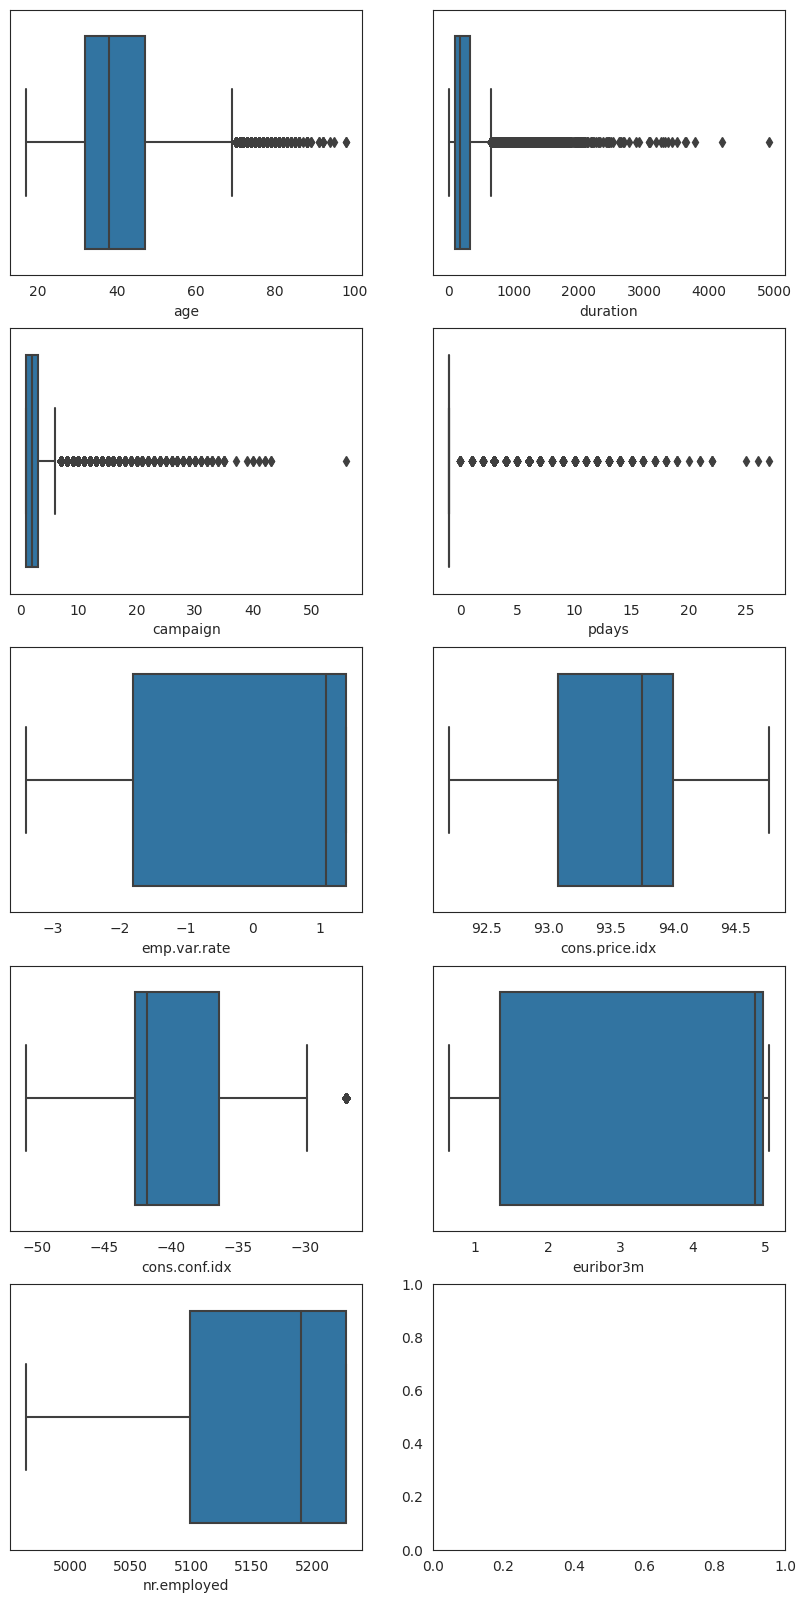

In [19]:
# Box plots for numerical columns
fig, axes = plt.subplots(5, 2, figsize = (10, 20))
cols = continuous_columns
for i in range(len(cols)):
    p = sns.boxplot(x = cols[i], data = df, ax = axes[i//2,i%2])

1. **Age:**
   - The box plot for age reveals a relatively narrow interquartile range (IQR) with a median around 38 years. Outliers are present, especially beyond the upper whisker, indicating a few clients with notably higher ages.

2. **Duration:**
   - The duration box plot displays a wide range of call durations, with a median around 180 seconds. There are numerous outliers on the upper side, suggesting some exceptionally long conversations.

3. **Campaign:**
   - The number of contacts made during the campaign exhibits a moderate spread, with a median around 2. The box plot reveals some outliers on the upper side, indicating a few instances of extensive contact.

4. **Pdays:**
   - The box plot for pdays shows that the majority of clients were not previously contacted (-1), with a few outliers indicating positive values. This aligns with the summary statistics, highlighting a right-skewed distribution.

5. **Emp.var.rate:**
   - The employment variation rate box plot illustrates variations in economic conditions, with a median around 0. The IQR suggests moderate variability.

6. **Cons.price.idx:**
   - Consumer price index variations are evident in the box plot, with a median around 93.75.
   
7. **Cons.conf.idx:**
   - The consumer confidence index box plot displays variations in consumer confidence, with a median around -41.8. Outliers indicate instances of notably high or low consumer confidence.

8. **Euribor3m:**
   - The Euribor 3-month rate box plot highlights variations in the interest rate, with a median around 4.86.

9. **Nr.employed:**
   - The box plot for the number of employees suggests moderate variability, with a median around 5191.

#### 4.3.2 Bivariate Analysis

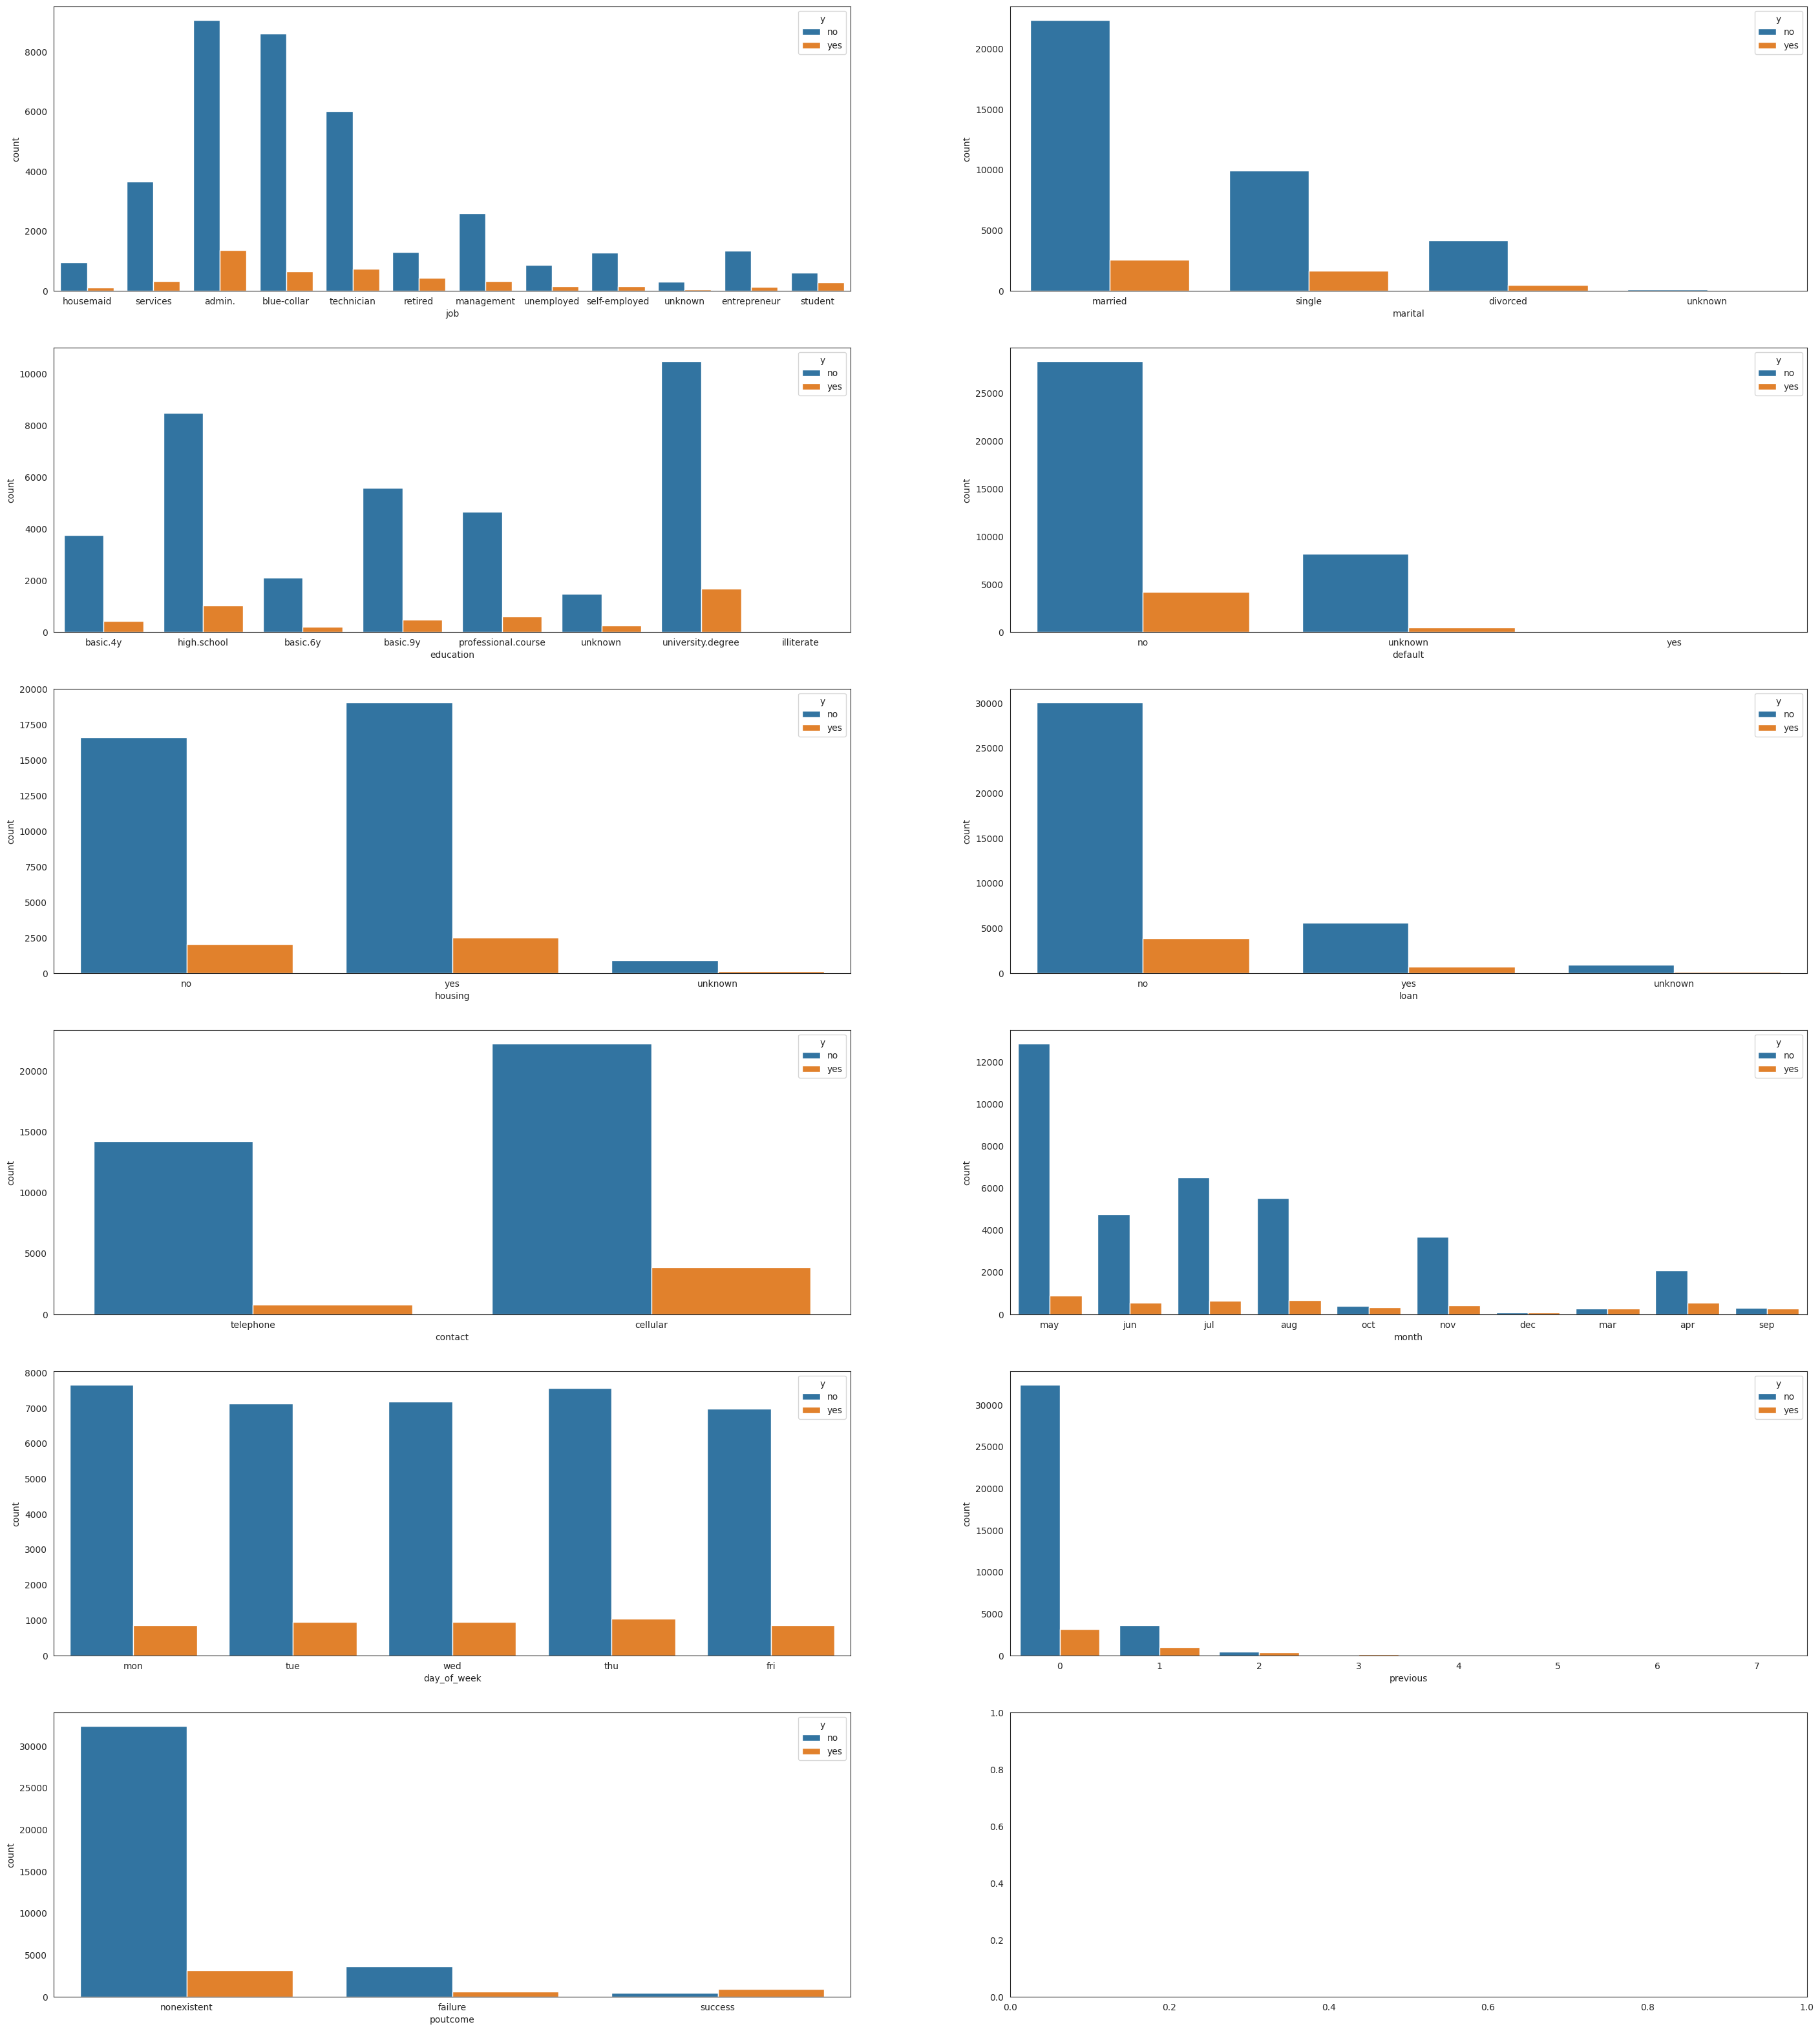

In [20]:
# Countplot for Categorical Columns vs. 'y'
fig, axes = plt.subplots(6, 2, figsize = (35, 40))
cols = categorical_columns[:-1]
for i in range(len(cols)):
    p = sns.countplot(x = cols[i], hue='y', data = df, ax = axes[i//2,i%2])

1. **Job:**
   - Individuals in administrative, blue-collar, and technician roles are prevalent in both "yes" and "no" responses. However, students and retired individuals show a higher likelihood of saying "yes."

2. **Marital:**
   - Married individuals form the majority in both "yes" and "no" categories, while singles exhibit a slightly higher tendency to say "yes" compared to other marital statuses.

3. **Education:**
   - Clients with a university degree are distributed relatively evenly between "yes" and "no." Those with basic education levels are more prominent in the "no" category.

4. **Default:**
   - Clients without a default history are more likely to decline subscribing. The number of clients with a default history is relatively small in both "yes" and "no" categories.

5. **Housing:**
   - Clients with housing loans are prevalent in both "yes" and "no" categories, suggesting housing status may not be a decisive factor in subscription decisions.

6. **Loan:**
   - Clients without personal loans are more numerous in both "yes" and "no" categories. Having a personal loan doesn't seem to significantly influence subscription decisions.

7. **Contact:**
   - Clients contacted via cellular communication are more likely to decline subscribing, while those contacted via telephone exhibit a slightly higher proportion of positive responses.

8. **Month:**
   - May has the highest count of "no" responses, whereas months like March and December show a higher proportion of "yes" responses. Seasonal variations might impact subscription decisions.

9. **Day_of_week:**
   - The day of the week doesn't appear to strongly influence subscription decisions, with similar distributions across different days for both "yes" and "no" responses.

10. **Previous:**
    - Clients with fewer previous contacts are more likely to say "no," while those with higher numbers of previous contacts show a higher likelihood of subscribing.

11. **Poutcome:**
    - Clients with successful outcomes from the previous marketing campaign are more likely to subscribe, whereas those with nonexistent outcomes are predominant in the "no" category.

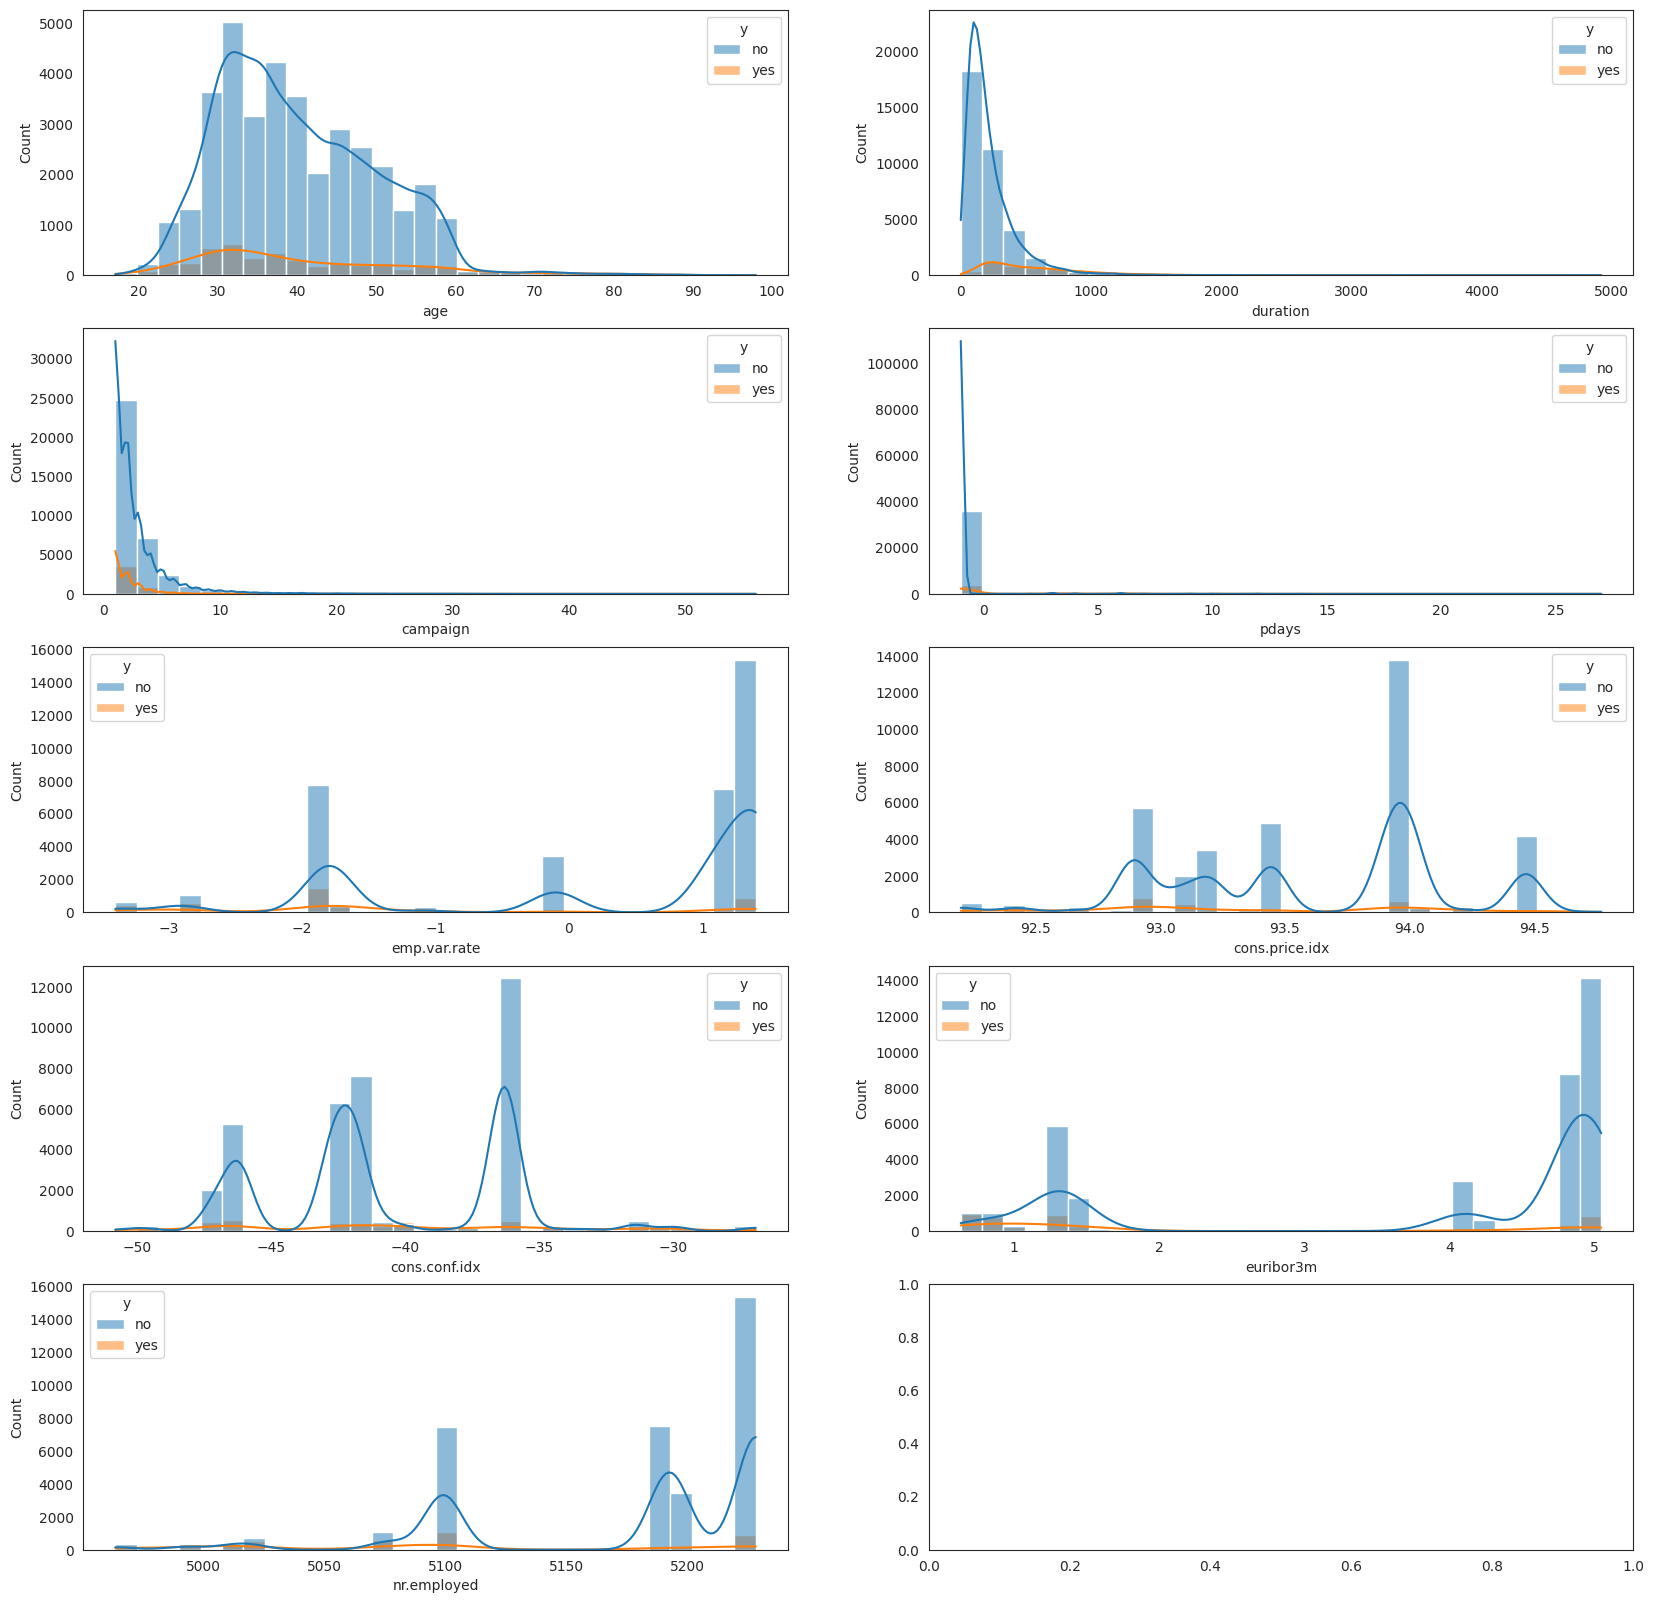

In [21]:
# Histplot for Continuous Columns vs. 'y'
fig, axes = plt.subplots(5, 2, figsize = (20, 20))
cols = continuous_columns
for i in range(len(cols)):
    p = sns.histplot(x = cols[i], hue='y', data = df, kde=True, bins=30, ax = axes[i//2,i%2])

1. **Age:**
   - The age distribution for both "yes" and "no" categories is relatively similar, with a peak around 30-40 years. Outliers are present in both categories, indicating clients of various ages in both subscription outcomes.

2. **Duration:**
   - The distribution of call durations for "yes" is right-skewed, with a peak around 200-400 seconds. "No" responses show a wider range of durations, with a higher concentration in shorter calls but also a notable number of outliers in longer conversations.

3. **Campaign:**
   - The number of contacts made during the campaign is concentrated around 1-3 for both "yes" and "no." However, "yes" responses have a higher concentration at lower campaign numbers, suggesting more efficient campaigns for subscribers.

4. **Pdays:**
   - For both "yes" and "no" categories, the majority of clients were not previously contacted (-1), with "yes" responses showing a slightly more extended range of positive values.

5. **Emp.var.rate:**
   - The employment variation rate exhibits different distributions for "yes" and "no." "No" responses show a broader range of values, while "yes" responses are concentrated around positive rates, indicating potential economic influences on subscriptions.

6. **Cons.price.idx:**
   - Consumer price index values are slightly lower for "yes" responses, suggesting that clients who subscribe may be more sensitive to changes in consumer prices during the campaign.

7. **Cons.conf.idx:**
   - The consumer confidence index varies between "yes" and "no" responses, with "yes" responses showing a slightly higher concentration at lower confidence levels.

8. **Euribor3m:**
   - The Euribor 3-month rate for "yes" responses is concentrated around lower values, while "no" responses show a broader range. The distribution suggests that the Euribor rate may influence subscription decisions.

9. **Nr.employed:**
   - The number of employees exhibits differences in distribution for "yes" and "no" categories. "No" responses show a broader range, while "yes" responses are concentrated around specific employment levels.

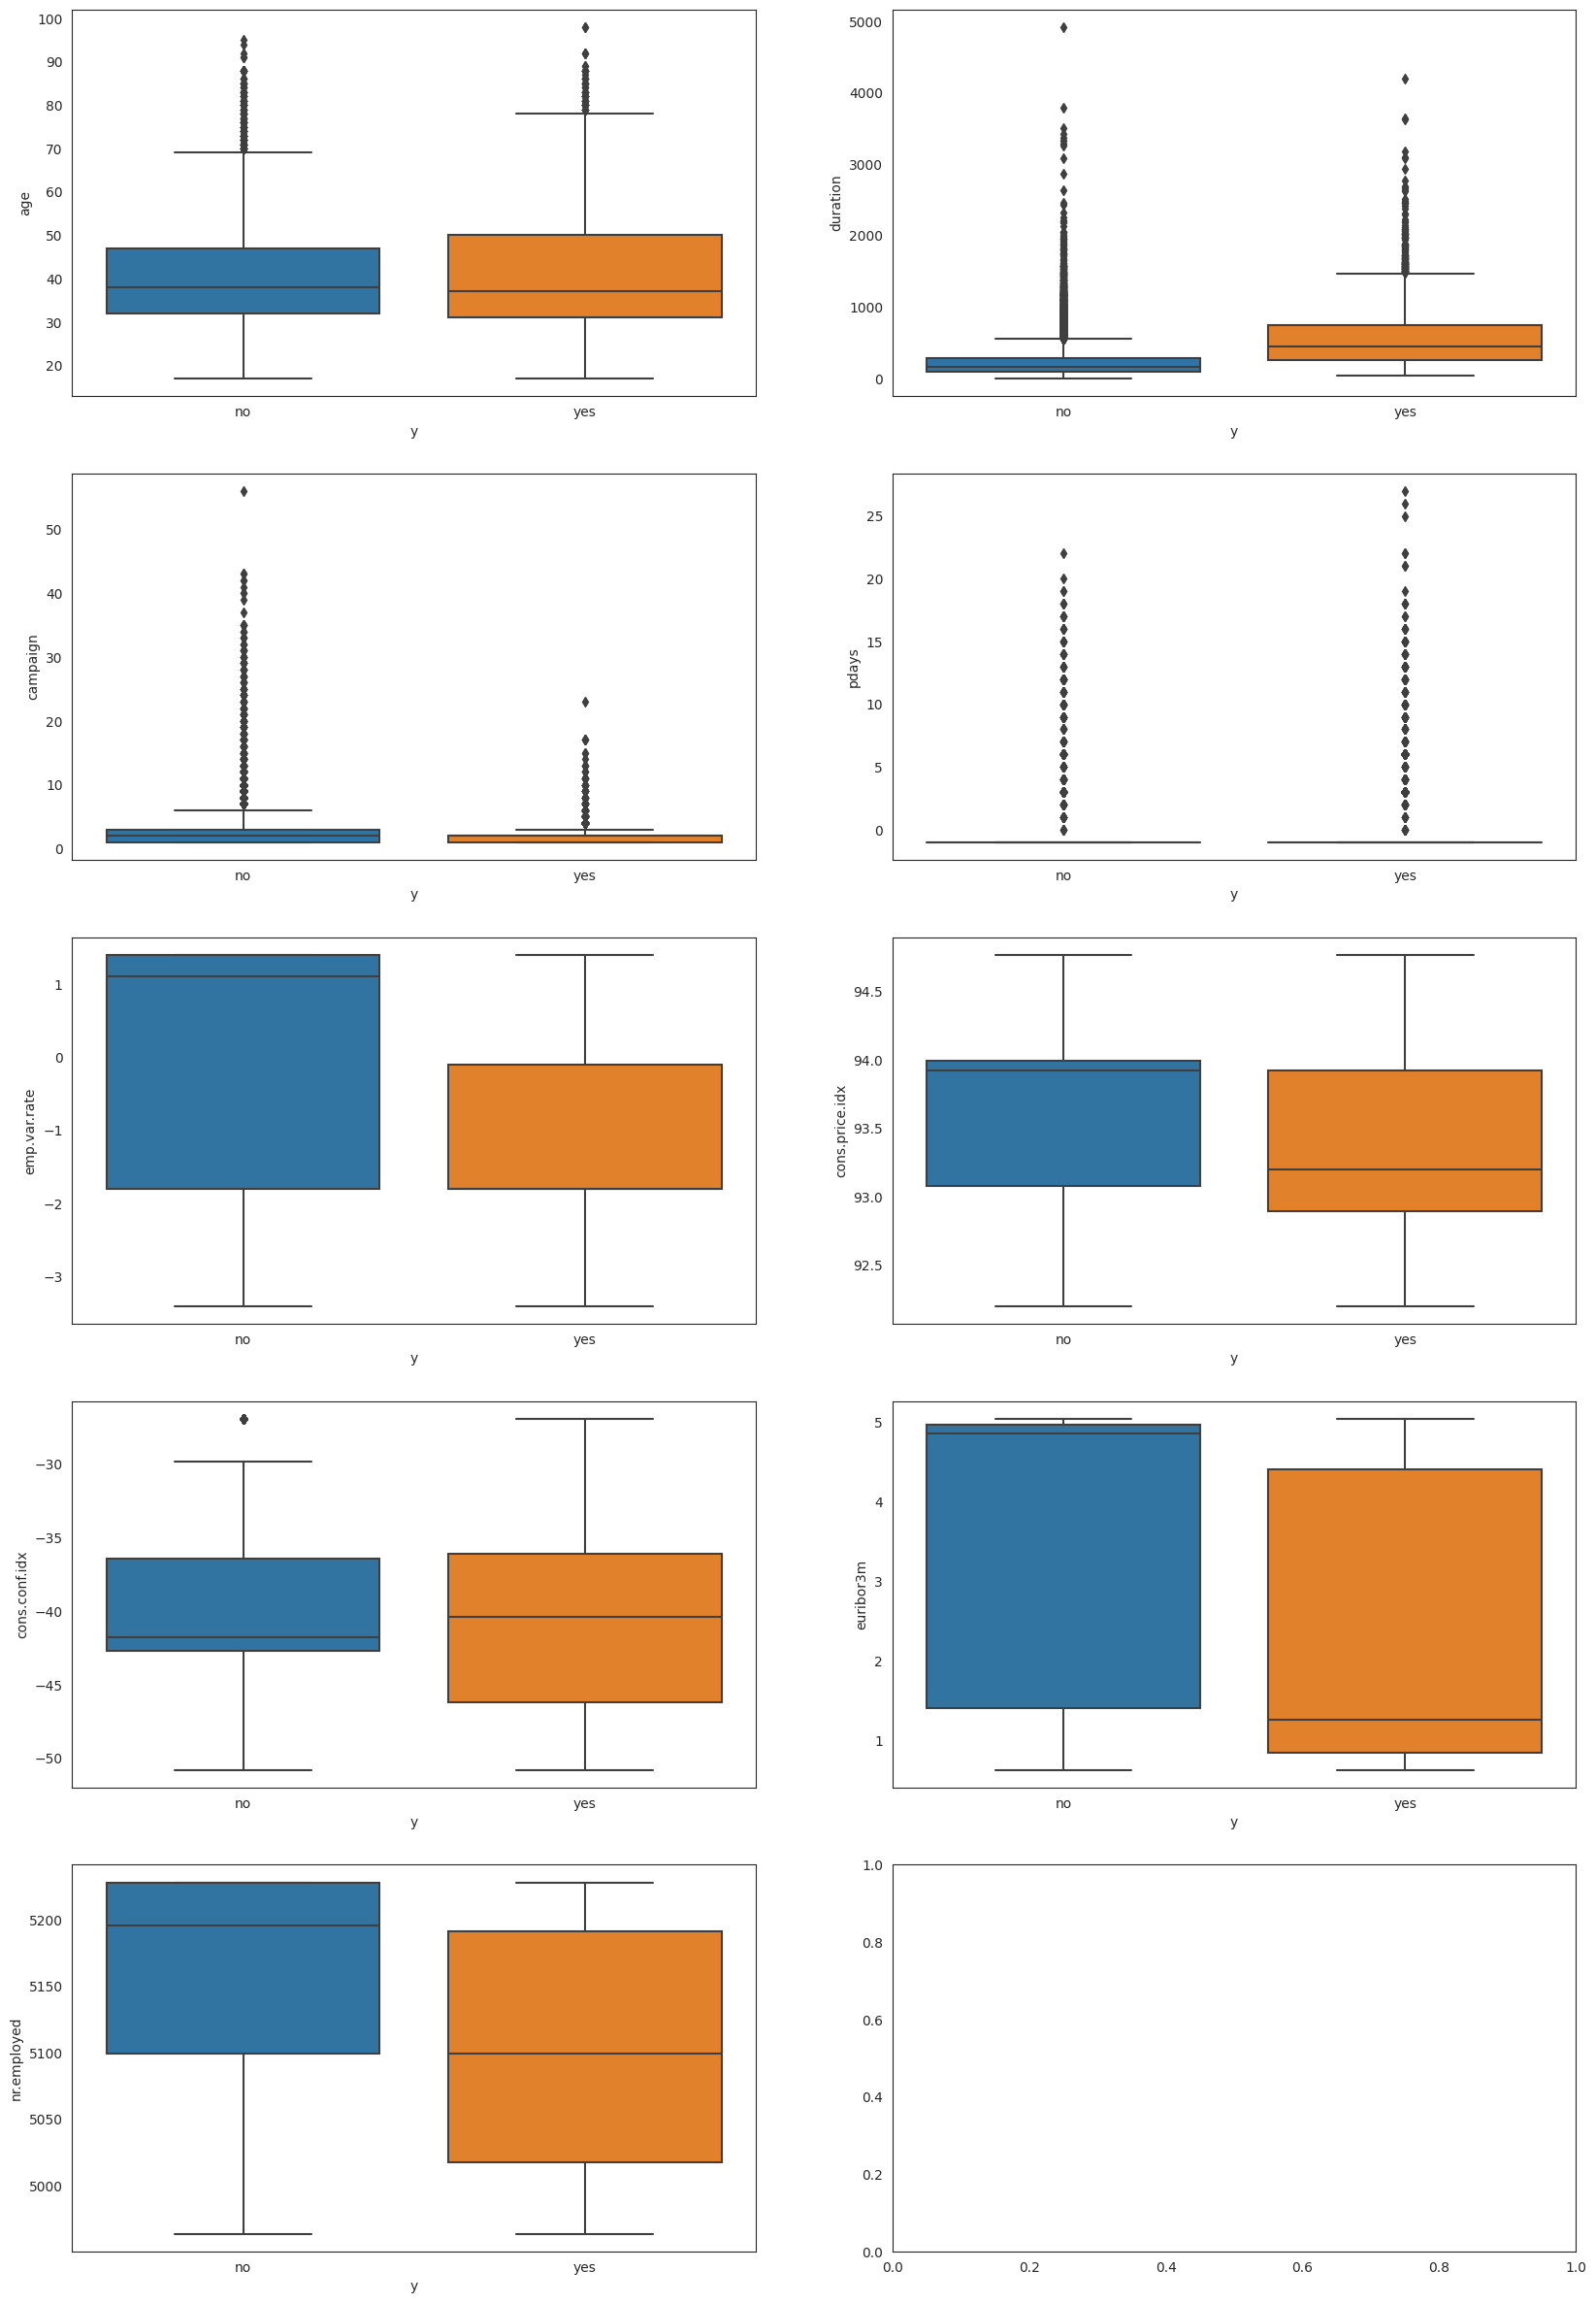

In [22]:
# Box Plot for Continuous Columns vs. 'y'
fig, axes = plt.subplots(5, 2, figsize = (20, 30))
cols = continuous_columns
for i in range(len(cols)):
    p = sns.boxplot(x='y', y = cols[i], data = df, ax = axes[i//2,i%2])

1. **Age:**
   - The box plot reveals a similar median age for both "yes" and "no" categories, with a slightly wider interquartile range for "yes" responses. Outliers suggest variability in ages for both subscription outcomes.

2. **Duration:**
   - The box plot for call durations illustrates a significantly higher median duration for "yes" responses, indicating that longer calls are associated with a higher likelihood of subscription. The interquartile range for "yes" is also notably wider.

3. **Campaign:**
   - "Yes" responses have a lower median and a narrower interquartile range for the number of contacts during the campaign, suggesting that successful subscriptions are often associated with fewer campaign contacts.

4. **Pdays:**
   - The box plot reveals that successful subscriptions ("yes") are associated with a lower median and a narrower interquartile range for the previous contact days. The majority of clients in both categories were not previously contacted.

5. **Emp.var.rate:**
   - Economic variations have a distinct impact, with "yes" responses showing a lower median and a narrower interquartile range compared to "no." Successful subscriptions are associated with more stable economic conditions.

6. **Cons.price.idx:**
   - Consumer price index variations show a slightly lower median for "yes" responses, suggesting that successful subscriptions are associated with periods of slightly lower consumer prices.

7. **Cons.conf.idx:**
   - Consumer confidence index values are lower for "yes" responses, with a narrower interquartile range. This indicates that successful subscriptions are associated with periods of slightly lower consumer confidence.

8. **Euribor3m:**
   - The Euribor 3-month rate is notably lower for "yes" responses, with a lower median and a narrower interquartile range. This suggests that lower Euribor rates are associated with successful subscriptions.

9. **Nr.employed:**
   - The number of employees shows a lower median for "yes" responses, indicating that successful subscriptions are associated with a slightly lower number of employed individuals. The interquartile range is also narrower for "yes."

In [23]:
# A broader look at correlation between the Continuous Columns of dataframe
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.00,-0.00,0.00,0.02,0.02,-0.00,0.00,0.13,0.01,-0.02
duration,-0.00,1.00,-0.07,0.05,0.02,-0.03,0.01,-0.01,-0.03,-0.04
campaign,0.00,-0.07,1.00,-0.04,-0.08,0.15,0.13,-0.01,0.14,0.14
pdays,0.02,0.05,-0.04,1.00,0.51,-0.23,-0.05,0.07,-0.26,-0.34
previous,0.02,0.02,-0.08,0.51,1.00,-0.42,-0.20,-0.05,-0.45,-0.50
emp.var.rate,-0.00,-0.03,0.15,-0.23,-0.42,1.00,0.78,0.20,0.97,0.91
cons.price.idx,0.00,0.01,0.13,-0.05,-0.20,0.78,1.00,0.06,0.69,0.52
cons.conf.idx,0.13,-0.01,-0.01,0.07,-0.05,0.20,0.06,1.00,0.28,0.10
euribor3m,0.01,-0.03,0.14,-0.26,-0.45,0.97,0.69,0.28,1.00,0.95
nr.employed,-0.02,-0.04,0.14,-0.34,-0.50,0.91,0.52,0.10,0.95,1.00


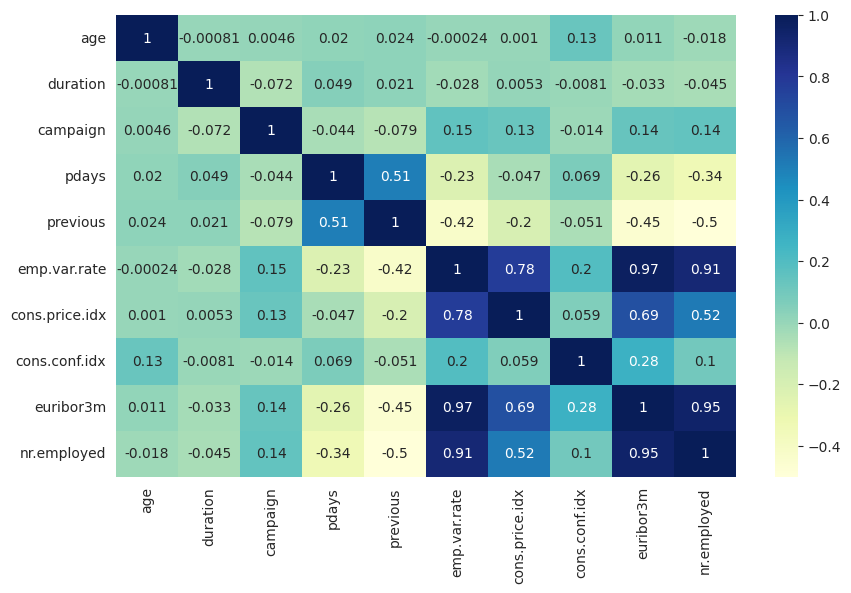

In [24]:
# Correlation Plot above as a Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

Here are some observations based on the correlation matrix:

1. **Age:**
   - Age has a very weak correlation with other variables, indicating that age is not strongly correlated with other continuous features.

2. **Duration:**
   - Duration exhibits weak correlations with other variables. This is expected, as the duration of the call is likely independent of other numerical features.

3. **Campaign:**
   - Campaign shows weak to moderate positive correlations with emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, and nr.employed. This suggests a subtle relationship between the number of contacts during the campaign and these economic indicators.

4. **Pdays:**
   - Pdays (number of days since the client was last contacted) has a strong positive correlation with previous (number of contacts performed before this campaign). This is expected, as a higher number of previous contacts often means a longer time since the last contact.

5. **Previous:**
   - Previous has strong negative correlations with emp.var.rate, cons.price.idx, euribor3m, and nr.employed. This indicates that a higher number of contacts performed before this campaign is associated with certain economic indicators.

6. **Emp.var.rate, Cons.price.idx, Euribor3m, Nr.employed:**
   - These economic indicators (employment variation rate, consumer price index, Euribor 3-month rate, number of employees) show strong correlations among themselves, which is expected as they are related economic metrics.

7. **Cons.conf.idx:**
   - Cons.conf.idx (consumer confidence index) has weak to moderate correlations with other variables. Notably, it has a moderate positive correlation with emp.var.rate.

These observations provide insights into the relationships between the continuous variables in the dataset.

#### 4.3.3 Outlier Detection and Behaviour

In [25]:
# Function to detect Outliers
def outlier_detection(df_copy,col,target):

  print(f"\nOutlier detection for column: {col}\n")

  data = df_copy[col]

  # Calculate percentiles
  percentiles = np.percentile(data, np.arange(0, 101, 1))

  # Calculate differences between consecutive percentiles
  differences = np.diff(percentiles)

  # Find the index of the maximum difference
  max_diff_index = np.argmax(differences)

  # Identify the range with the significant difference
  significant_percentiles = np.arange(max_diff_index, max_diff_index + 2)

  print("Percentiles with the significant difference:", significant_percentiles)
  print("Values at the percentiles with the significant difference:", [percentiles[significant_percentiles[0]],
                                                                       percentiles[significant_percentiles[1]]])

  # filter the data based on percentile
  filtered_data = df_copy[df_copy[col] > percentiles[significant_percentiles[0]]]
  print(f"\n Filtered data with {col} and {target} = 'yes' sorted in descending order\n",
        filtered_data[filtered_data[target]=='yes'][[col,target]].sort_values(by = col, ascending=False))
  print(f"\n Filtered data with {col} and {target} = 'no' sorted in descending order\n",
        filtered_data[filtered_data[target]=='no'][[col,target]].sort_values(by = col, ascending=False),"\n")

  # Plot histplot with KDE for the significant range
  sns.histplot(data = filtered_data, x=col, hue=target, bins=30, kde=True)
  plt.show()

- A Python function, `outlier_detection`, is created for outlier detection in a specified column of a DataFrame, with a focus on the impact on a target variable.
- The function calculates percentiles for the given column, identifies the range with the most significant difference between consecutive percentiles, and filters the data based on this range.
- It then displays the values at the identified percentiles, as well as the filtered data sorted in descending order for both 'yes' and 'no' categories of the target variable.
- Finally, the function produces a histogram plot with a kernel density estimate (KDE) for the significant range.
- This visual representation allows for an exploration of the distribution of the specified column concerning the target variable.
- This function is leveraged to gain insights into potential outliers and their relationship with the target variable, aiding in the understanding of data patterns and anomalies.


Outlier detection for column: age

Percentiles with the significant difference: [ 99 100]
Values at the percentiles with the significant difference: [71.0, 98.0]

 Filtered data with age and y = 'yes' sorted in descending order
        age    y
38452   98  yes
38455   98  yes
40469   92  yes
39734   92  yes
40450   92  yes
...    ...  ...
38740   72  yes
37954   72  yes
40196   72  yes
39601   72  yes
38556   72  yes

[181 rows x 2 columns]

 Filtered data with age and y = 'no' sorted in descending order
        age   y
27826   95  no
38921   94  no
39655   92  no
38022   91  no
38032   91  no
...    ...  ..
40219   72  no
40414   72  no
37137   72  no
40529   72  no
39768   72  no

[188 rows x 2 columns] 



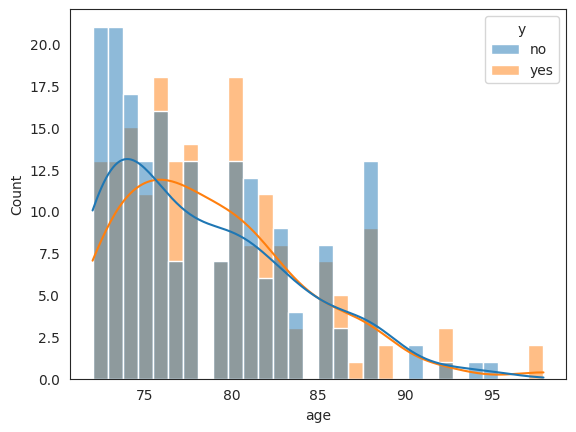


Outlier detection for column: duration

Percentiles with the significant difference: [ 99 100]
Values at the percentiles with the significant difference: [1271.25, 4918.0]

 Filtered data with duration and y = 'yes' sorted in descending order
        duration    y
22192      4199  yes
13820      3643  yes
7727       3631  yes
12029      3183  yes
6280       3094  yes
...         ...  ...
32265      1276  yes
9149       1276  yes
15094      1275  yes
33221      1272  yes
12433      1272  yes

[257 rows x 2 columns]

 Filtered data with duration and y = 'no' sorted in descending order
        duration   y
24091      4918  no
40537      3785  no
36043      3509  no
19632      3422  no
2313       3366  no
...         ...  ..
16166      1281  no
6803       1277  no
11473      1276  no
1077       1273  no
13120      1272  no

[155 rows x 2 columns] 



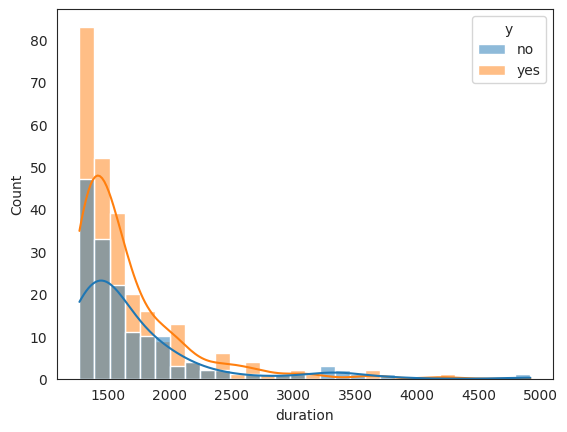


Outlier detection for column: campaign

Percentiles with the significant difference: [ 99 100]
Values at the percentiles with the significant difference: [14.0, 56.0]

 Filtered data with campaign and y = 'yes' sorted in descending order
        campaign    y
3219         23  yes
10162        17  yes
17284        17  yes
17655        17  yes
29980        17  yes
7544         15  yes
8528         15  yes

 Filtered data with campaign and y = 'no' sorted in descending order
        campaign   y
4107         56  no
13447        43  no
18728        43  no
5304         42  no
4168         42  no
...         ...  ..
22915        15  no
23042        15  no
9090         15  no
8712         15  no
22251        15  no

[399 rows x 2 columns] 



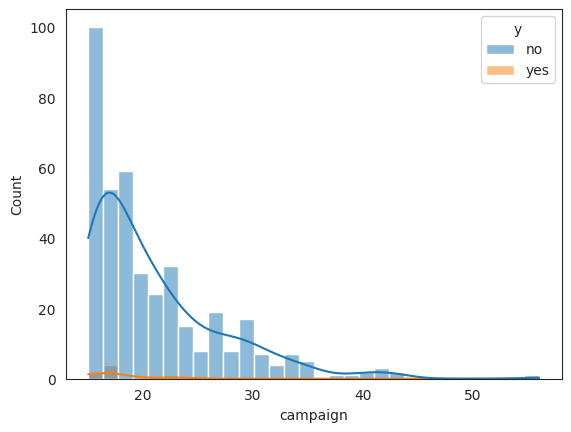


Outlier detection for column: pdays

Percentiles with the significant difference: [ 99 100]
Values at the percentiles with the significant difference: [6.0, 27.0]

 Filtered data with pdays and y = 'yes' sorted in descending order
        pdays    y
40874     27  yes
40243     26  yes
40234     25  yes
40668     22  yes
39883     22  yes
...      ...  ...
38698      7  yes
38644      7  yes
38575      7  yes
40575      7  yes
39588      7  yes

[233 rows x 2 columns]

 Filtered data with pdays and y = 'no' sorted in descending order
        pdays   y
40489     22  no
40893     20  no
40836     19  no
41105     19  no
40745     18  no
...      ...  ..
39331      7  no
39358      7  no
39584      7  no
39610      7  no
38746      7  no

[165 rows x 2 columns] 



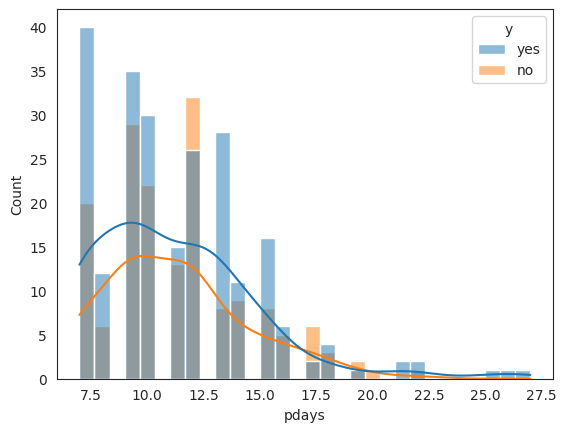


Outlier detection for column: emp.var.rate

Percentiles with the significant difference: [41 42]
Values at the percentiles with the significant difference: [-0.1, 1.1]

 Filtered data with emp.var.rate and y = 'yes' sorted in descending order
        emp.var.rate    y
14410          1.40  yes
17009          1.40  yes
17074          1.40  yes
17070          1.40  yes
17055          1.40  yes
...             ...  ...
5363           1.10  yes
5347           1.10  yes
5329           1.10  yes
5174           1.10  yes
75             1.10  yes

[1106 rows x 2 columns]

 Filtered data with emp.var.rate and y = 'no' sorted in descending order
        emp.var.rate   y
11857          1.40  no
15922          1.40  no
15945          1.40  no
15944          1.40  no
15943          1.40  no
...             ...  ..
5173           1.10  no
5175           1.10  no
5176           1.10  no
5177           1.10  no
0              1.10  no

[22884 rows x 2 columns] 



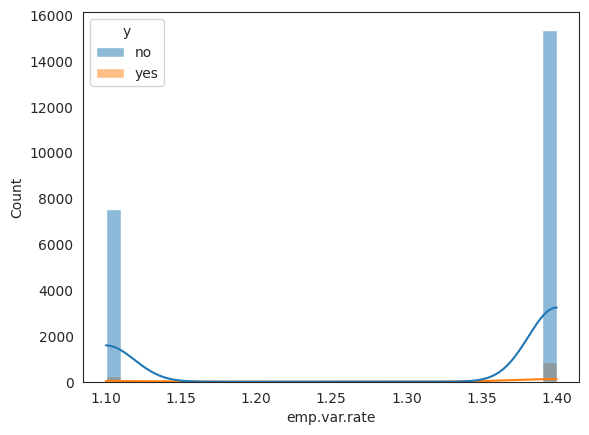


Outlier detection for column: cons.price.idx

Percentiles with the significant difference: [49 50]
Values at the percentiles with the significant difference: [93.444, 93.749]

 Filtered data with cons.price.idx and y = 'yes' sorted in descending order
        cons.price.idx    y
41186           94.77  yes
41101           94.77  yes
41126           94.77  yes
41125           94.77  yes
41124           94.77  yes
...               ...  ...
39544           93.75  yes
39545           93.75  yes
39547           93.75  yes
39549           93.75  yes
39441           93.75  yes

[1800 rows x 2 columns]

 Filtered data with cons.price.idx and y = 'no' sorted in descending order
        cons.price.idx   y
41187           94.77  no
41096           94.77  no
41087           94.77  no
41090           94.77  no
41091           94.77  no
...               ...  ..
39439           93.75  no
39437           93.75  no
39436           93.75  no
39435           93.75  no
39563           93.75  no

[18878 

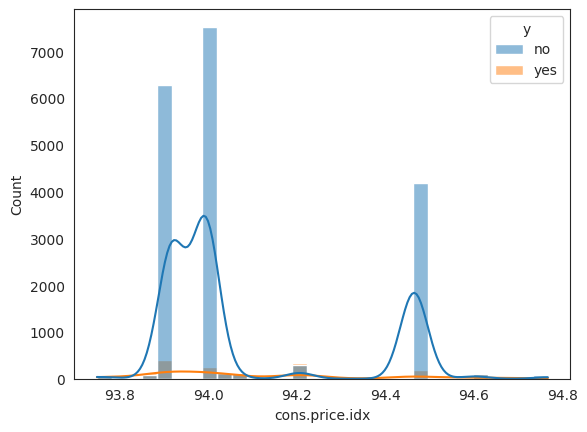


Outlier detection for column: cons.conf.idx

Percentiles with the significant difference: [21 22]
Values at the percentiles with the significant difference: [-46.2, -42.7]

 Filtered data with cons.conf.idx and y = 'yes' sorted in descending order
        cons.conf.idx    y
38438         -26.90  yes
38432         -26.90  yes
38437         -26.90  yes
38439         -26.90  yes
38440         -26.90  yes
...              ...  ...
16884         -42.70  yes
16917         -42.70  yes
16920         -42.70  yes
17377         -42.70  yes
27689         -45.90  yes

[3396 rows x 2 columns]

 Filtered data with cons.conf.idx and y = 'no' sorted in descending order
        cons.conf.idx   y
38525         -26.90  no
38458         -26.90  no
38410         -26.90  no
38412         -26.90  no
38413         -26.90  no
...              ...  ..
27686         -45.90  no
27685         -45.90  no
27684         -45.90  no
27682         -45.90  no
27683         -45.90  no

[28916 rows x 2 columns] 



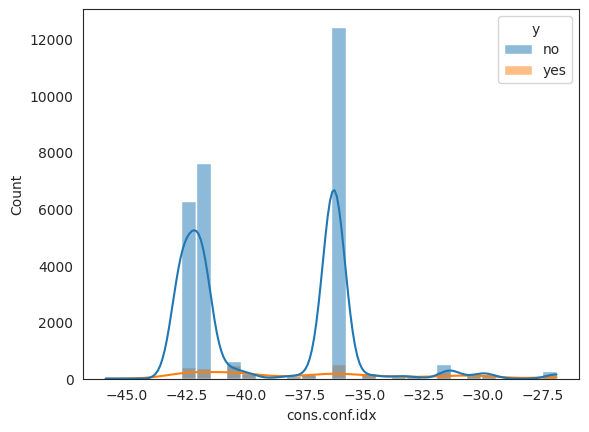


Outlier detection for column: euribor3m

Percentiles with the significant difference: [32 33]
Values at the percentiles with the significant difference: [1.483, 4.021]

 Filtered data with euribor3m and y = 'yes' sorted in descending order
        euribor3m    y
24005       5.04  yes
23998       5.04  yes
23999       5.04  yes
24000       5.04  yes
24001       5.04  yes
...          ...  ...
27983       1.50  yes
27987       1.50  yes
27988       1.50  yes
27994       1.50  yes
28003       1.50  yes

[1471 rows x 2 columns]

 Filtered data with euribor3m and y = 'no' sorted in descending order
        euribor3m   y
23997       5.04  no
24002       5.04  no
24003       5.04  no
24004       5.04  no
24010       5.00  no
...          ...  ..
27976       1.50  no
27975       1.50  no
27974       1.50  no
27972       1.50  no
28006       1.50  no

[26528 rows x 2 columns] 



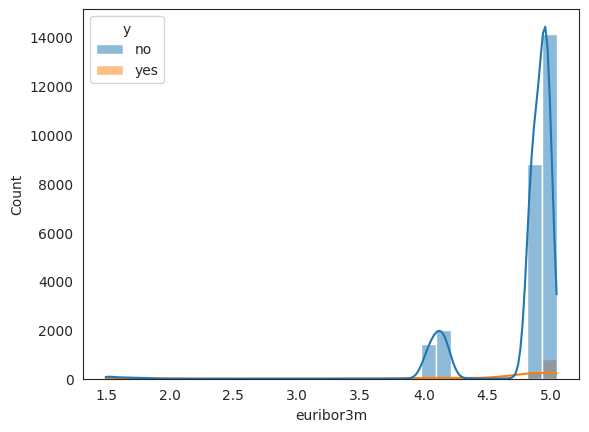


Outlier detection for column: nr.employed

Percentiles with the significant difference: [32 33]
Values at the percentiles with the significant difference: [5099.1, 5191.0]

 Filtered data with nr.employed and y = 'yes' sorted in descending order
        nr.employed    y
15810      5228.10  yes
16884      5228.10  yes
16966      5228.10  yes
16960      5228.10  yes
16927      5228.10  yes
...            ...  ...
5363       5191.00  yes
5347       5191.00  yes
5329       5191.00  yes
5174       5191.00  yes
27689      5176.30  yes

[1339 rows x 2 columns]

 Filtered data with nr.employed and y = 'no' sorted in descending order
        nr.employed   y
13680      5228.10  no
13003      5228.10  no
13021      5228.10  no
13020      5228.10  no
13019      5228.10  no
...            ...  ..
27684      5176.30  no
27685      5176.30  no
27686      5176.30  no
27687      5176.30  no
27688      5176.30  no

[26343 rows x 2 columns] 



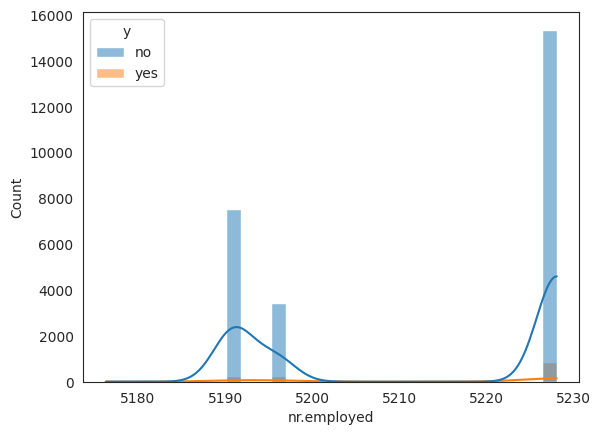

In [26]:
# Checking outliers behaviour against target variable for continuous variables
for c in continuous_columns:
  outlier_detection(df,c,'y')

From the above analysis, we can observe that for campaign values > 23, the target variable is always 'no'. This observation can help us to create a binary feature for the dataset.

## 5. Data Preparation

### 5.1 Feature Engineering

In [27]:
# Creating extra feature
df['campaign_inference'] = df['campaign'].apply(lambda x: 0 if x > 25 else 1)

'campaign_inference' is the new binary feature created for the dataset.

### 5.2 Train-Test split of dataset

In [28]:
# Collecting features
X = df.drop('y', axis=1)
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign_inference
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,-1,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,-1,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,-1,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,-1,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,-1,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,1


All the features are collected in a dataframe 'X' to create a training and testing dataset of features out of it.

In [29]:
# Collecting target variable
y = df['y']
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

Target values for each row are collected in a Pandas Series 'y' to create a training and testing dataset of target values out of it.

In [30]:
# Splitting dataset for training and testing of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- The dataset is split in an 80:20 ratio, where 80% of the data is reserved for training the model and 20% is for testing the model.
- X_train is the features dataframe, and y_train is the Pandas series that will be used for training the model.
- X_test is the features dataframe, and y_test is the Pandas series that will be used for testing the model.

### 5.3 Encoding of Columns

In [31]:
# Encoding the target variable for training and testing dataset
y_train = y_train.replace({'yes': 1, 'no': 0})
y_test = y_test.replace({'yes': 1, 'no': 0})

- The target variable for both the training and testing datasets is encoded to facilitate machine learning model training.
- The target variable values 'yes' and 'no' are replaced with numerical equivalents, where 'yes' is encoded as 1, and 'no' is encoded as 0.

In [32]:
# Preprocessing categorical columns
X_train_cat_processed = pd.DataFrame()
X_test_cat_processed = pd.DataFrame()
tfidf_vect_train_dict = {}

# Encoding categorical columns into TFTDF vectors
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
            'poutcome']:
  vectorizer = TfidfVectorizer()
  X_train_col = vectorizer.fit_transform(X_train[col])
  X_test_col = vectorizer.transform(X_test[col])
  X_train_cat_processed = hstack((X_train_cat_processed, X_train_col))
  X_test_cat_processed = hstack((X_test_cat_processed, X_test_col))
  tfidf_vect_train_dict[col] = vectorizer

# Saving the TFIDF vector to local to use it at the time of productionization of code
pickle.dump(tfidf_vect_train_dict, open("tfidf_vect_train_dict.pickle", "wb"))

- The code snippet performs preprocessing of categorical columns.
- It utilizes the TfidfVectorizer from the scikit-learn library.
- Categorical columns include 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', and 'poutcome'.
- The encoding is done using TFIDF (Term Frequency-Inverse Document Frequency) vectors.
- Processed data is stored in two DataFrames, `X_train_cat_processed` and `X_test_cat_processed`.
- A dictionary named `tfidf_vect_train_dict` is created to store the trained TfidfVectorizer instances for each categorical column.
- The dictionary is saved to a local file ("tfidf_vect_train_dict.pickle") for future use during the productionization of the code.

In [33]:
# Preprocessing numerical columns
cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
        'euribor3m', 'nr.employed', 'campaign_inference']

# Converting selected columns to NumPy array
X_train_col = X_train[cols].values
X_test_col = X_test[cols].values

# Concatenating the arrays along the columns
X_train_num_processed = np.concatenate((X_train_col,), axis=1)
X_test_num_processed = np.concatenate((X_test_col,), axis=1)

- The code snippet performs preprocessing of numerical columns.
- A list of selected numerical columns named 'cols' is specified.
- Values of these columns from the training and test datasets (`X_train` and `X_test`) are extracted into NumPy arrays, denoted as `X_train_col` and `X_test_col`.
- Subsequently, these arrays are concatenated along the columns to create processed numerical datasets, stored in `X_train_num_processed` and `X_test_num_processed`.
- Selected columns include features such as 'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', and 'campaign_inference'.

In [34]:
# Ensuring both arrays are 2D
if X_train_cat_processed.ndim == 1:
    X_train_cat_processed = X_train_cat_processed.reshape(-1, 1)

if X_test_cat_processed.ndim == 1:
    X_test_cat_processed = X_test_cat_processed.reshape(-1, 1)

if X_train_num_processed.ndim == 1:
    X_train_num_processed = X_train_num_processed.reshape(-1, 1)

if X_test_num_processed.ndim == 1:
    X_test_num_processed = X_test_num_processed.reshape(-1, 1)

# Horizontally stacking categorical and numerical columns to prepare the final training and testing dataset
X_train = hstack((X_train_cat_processed,X_train_num_processed))
X_test = hstack((X_test_cat_processed,X_test_num_processed))

- The processed categorical and numerical arrays need to be in a 2D format for horizontal stacking.
- The code checks the dimensions of these arrays and reshapes them if they are 1D.
- Subsequently, the code horizontally stacks the processed categorical and numerical columns to create the final training and testing datasets.
- The final training dataset is denoted as `X_train`, and the testing dataset is denoted as `X_test`.

### 5.4 Standardization

In [35]:
# Standardizing the feature values
stan_scaler = StandardScaler(with_mean=False)
X_train_scaled = stan_scaler.fit_transform(X_train)
X_test_scaled = stan_scaler.transform(X_test)

- For most models, standardizing feature values in the training and testing datasets is crucial.
- The code uses StandardScaler from scikit-learn for this purpose.
- A StandardScaler object is instantiated, and the parameter with_mean is set to False to handle sparse matrices.

## 6. Model Building

Now, multiple models will be attempted to fit the training data and achieve the best results.

### 6.1 Logistic Regression

The very first base model is logistic regression, as it is a binary classification task.

In [36]:
# Creation of logistic regression model
lg_model = LogisticRegression()

# Training the model
lg_model.fit(X_train_scaled, y_train)

# Predicting on the test set
lg_y_pred = lg_model.predict(X_test_scaled)

- A logistic regression model (`lg_model`) is instantiated.
- The model is trained on the scaled training dataset (`X_train_scaled`) using the fit method.
- Following the training phase, the model is used to predict outcomes on the test set (`X_test_scaled`) using the predict method.
- The predictions are stored in the variable `lg_y_pred`.

Let's evaluate the performance of the logistic regression model.

Accuracy: 0.9051



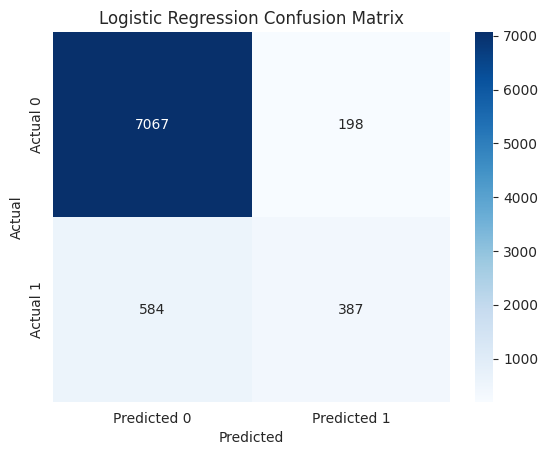


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7265
           1       0.66      0.40      0.50       971

    accuracy                           0.91      8236
   macro avg       0.79      0.69      0.72      8236
weighted avg       0.89      0.91      0.89      8236



In [37]:
# Evaluating the model
lg_accuracy = accuracy_score(y_test, lg_y_pred)
print(f"Accuracy: {lg_accuracy:.4f}\n")

# Printing the confusion matrix
lg_conf_matrix = confusion_matrix(y_test, lg_y_pred)
sns.heatmap(lg_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Printing classification report
print("\nClassification Report:")
print(classification_report(y_test, lg_y_pred))

- As established earlier, the dataset is imbalanced.
- Accuracy is considered a misleading metric in this context, as it can be inflated by the dominant class, disregarding the performance of the minority class.
- The F1 score, which considers both precision and recall, is deemed a better metric in such scenarios.
- It provides a balanced assessment, addressing the impact of false positives and false negatives, making it a more reliable measure of a model's performance in imbalanced datasets.
- For the logistic regression model, the F1 score is reported as 0.72.

### 6.2 Random Forest

The second machine learning model to be implemented is the Random Forest.

In [38]:
# Creation of a Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight = 'balanced')

- The Grid Search technique is employed for hyperparameter tuning.
- The objective is to identify the optimal model parameters that maximize the F1 score.

In [39]:
# Defining the hyperparameters and their possible values
param_grid = {
    'n_estimators': [225, 250, 275],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [1,2,4],
}
# Creating a grid search object with the Random Forest model and hyperparameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='f1', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions
rf_best_model = grid_search.best_estimator_
rf_y_pred = rf_best_model.predict(X_test)

Best Hyperparameters: {'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 250}


The best model, incorporating the optimal parameters, is used to make predictions on the test set (X_test), and the results are stored in rf_y_pred.

Let's evaluate the performance of the random forest Classifier.

Accuracy: 0.8963



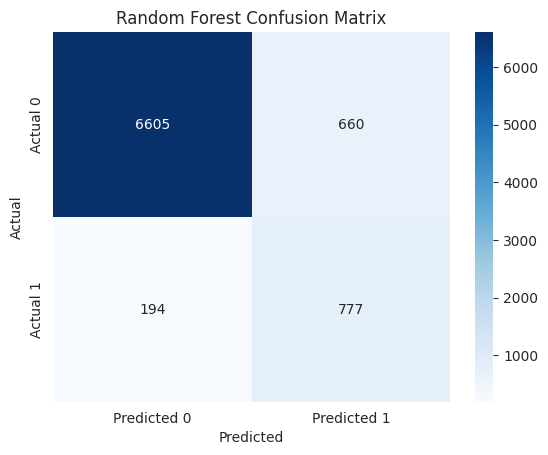


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7265
           1       0.54      0.80      0.65       971

    accuracy                           0.90      8236
   macro avg       0.76      0.85      0.79      8236
weighted avg       0.92      0.90      0.90      8236



In [40]:
# Evaluating the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Accuracy: {rf_accuracy:.4f}\n")

# Printing the confusion matrix as a heatmap
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Printing classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_y_pred))

The F1 score comes out to be 0.79.

### 6.3 Gradient Boosting

The next machine learning model to be implemented is Gradient Boosting.

In [41]:
# Creation of a Gradient Boosting Classifier
gbdt_classifier = GradientBoostingClassifier(random_state=42)

- The Grid Search technique is employed for hyperparameter tuning.
- The objective is to identify the optimal model parameters that maximize the F1 score.

In [42]:
# Defining parameter grid
param_grid = {
    'n_estimators': [25, 50, 75],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [2, 4, 6]
}

# Creating GridSearchCV object
grid_search = GridSearchCV(gbdt_classifier, param_grid, cv=5, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions
gbdt_best_model = grid_search.best_estimator_
gbdt_y_pred = gbdt_best_model.predict(X_test)

Best Hyperparameters: {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 50}


The best model, incorporating the optimal parameters, is used to make predictions on the test set (X_test), and the results are stored in gbdt_y_pred.

Let's evaluate the performance of the GBDT Classifier.

Accuracy: 0.9159



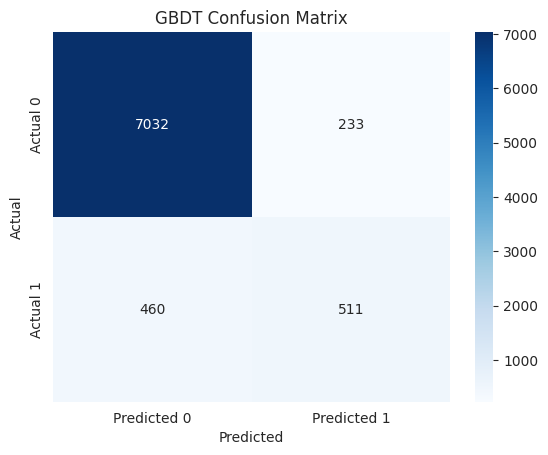


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7265
           1       0.69      0.53      0.60       971

    accuracy                           0.92      8236
   macro avg       0.81      0.75      0.77      8236
weighted avg       0.91      0.92      0.91      8236



In [43]:
# Evaluating the model
gbdt_accuracy = accuracy_score(y_test, gbdt_y_pred)
print(f"Accuracy: {gbdt_accuracy:.4f}\n")

# Printing the confusion matrix as a heatmap
gbdt_conf_matrix = confusion_matrix(y_test, gbdt_y_pred)
sns.heatmap(gbdt_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('GBDT Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Printing classification report
print("\nClassification Report:")
print(classification_report(y_test, gbdt_y_pred))

The F1 score comes out to be 0.77.

### 6.4 Multi - Layer Perceptron

- The final model implemented is a multi-layer perceptron (MLP).
- The MLP classifier is a type of neural network capable of learning complex patterns in data.
- Its performance is assessed through training and prediction on the given datasets.

In [36]:
# Creation of a Multi Layer Perceptron Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,150,100,50), max_iter=1000, random_state=42)

# Training the model
mlp.fit(X_train_scaled, y_train)

# Make predictions on the test set
mlp_y_pred = mlp.predict(X_test_scaled)

- The architecture of the neural network includes hidden layers with sizes (100, 150, 100, 50).
- The model is trained on the scaled training dataset (`X_train_scaled`) using the fit method.
- Subsequently, predictions are generated for the test set (`X_test_scaled`) using the predict method.
- The results are stored in the variable `mlp_y_pred`.

Let's evaluate the performance of the MLP Classfier.

Accuracy: 0.8877



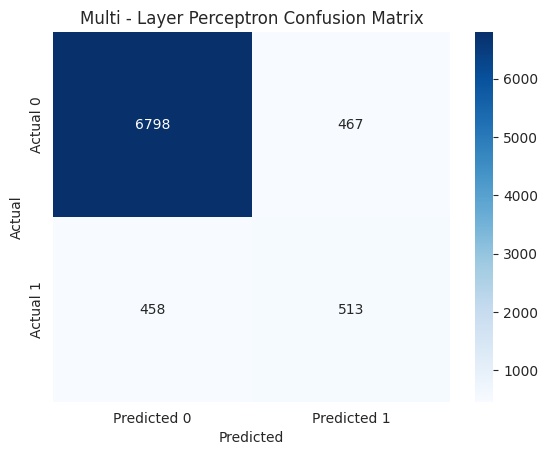


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7265
           1       0.52      0.53      0.53       971

    accuracy                           0.89      8236
   macro avg       0.73      0.73      0.73      8236
weighted avg       0.89      0.89      0.89      8236



In [37]:
# Evaluating the model
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
print(f"Accuracy: {mlp_accuracy:.4f}\n")

# Printing the confusion matrix as a heatmap
mlp_conf_matrix = confusion_matrix(y_test, mlp_y_pred)
sns.heatmap(mlp_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Multi - Layer Perceptron Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Printing classification report
print("\nClassification Report:")
print(classification_report(y_test, mlp_y_pred))

The F1 score comes out to be 0.73.

### 6.5 Final Chosen Model - Random Forest Classifier



- Among all the models considered, the Random Forest Classifier yielded the highest F1 score, indicating superior performance.
- Therefore, the Random Forest model is selected as the best-performing model and will be used for deployment.

In [36]:
# Creation of the Random Forest model based on best hyperparameters
model = RandomForestClassifier(random_state = 42, class_weight = 'balanced', min_samples_leaf = 2,
                                  min_samples_split = 10, n_estimators = 250)

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

This code snippet involves the creation of a Random Forest model with specified hyperparameters based on the earlier determined optimal values.

Let's evaluate the performance of the model again.

Accuracy: 0.8963



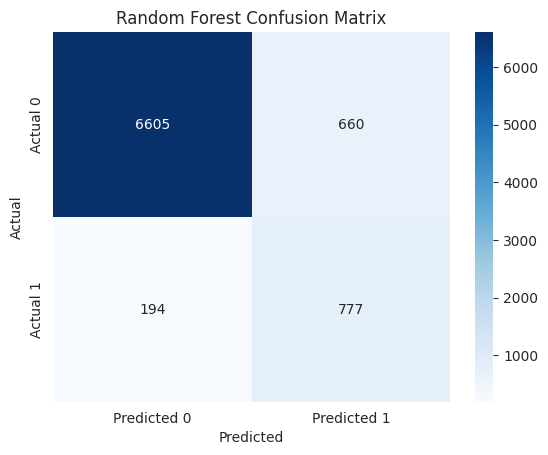


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7265
           1       0.54      0.80      0.65       971

    accuracy                           0.90      8236
   macro avg       0.76      0.85      0.79      8236
weighted avg       0.92      0.90      0.90      8236



In [37]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# Printing the confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Printing classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

- Similar to before, the F1 score turned out to be 0.79.
- This score indicates a good balance between precision and recall for the Random Forest model that will be deployed.

In [38]:
# Saving the model to local to use it at the time of productionization of code
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

- The code snippet saves the trained Random Forest model to a local file named 'model.sav' using the pickle module.
- This step is crucial for the productionization of the code, enabling the preservation of the trained model's state.
- The saved model file ('model.sav') can be loaded and utilized later for making predictions on new data during the deployment phase.